In [1]:
import pandas as pd
from pathlib import Path

# Loading the train.csv

In [2]:
TRAIN_CSV = Path('Artifacts/train.csv')

In [3]:
sales_df = pd.read_csv(TRAIN_CSV)
sales_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

# Getting More Information about train.csv

In [4]:
sales_df.shape

(8523, 12)

In [5]:
sales_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Checking for Nan values

In [7]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
sales_df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# Imputing the missing values for "Outlet_Size"

In [9]:
import matplotlib.pyplot as plt

In [10]:
print("Outlet_Size : ",sales_df["Outlet_Size"].dtype)

Outlet_Size :  object


In [11]:
sales_df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
sales_df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
without_Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False]
without_Nan_Outlet_size.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
4     Household   53.8614            OUT013                       1987   
5  Baking Goods   51.4008            OUT018                       2009   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.1380  
1      Medium               Tier 3  Supermarket Type2           443.4228  
2      Medium               Tier 1  Supermarket Type1          2097.2700  
4        High               Tier 3  Supermarket Type1           994.7052  
5      Medium               Tier 3  Supermarket Type2           556.6088

In [14]:
Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull()]
Nan_Outlet_size.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3            FDX07       19.200          Regular         0.000000   
8            FDH17       16.200          Regular         0.016687   
9            FDU28       19.200          Regular         0.094450   
25           NCD06       13.000          Low Fat         0.099887   
28           FDE51        5.925          Regular         0.161467   

                Item_Type  Item_MRP Outlet_Identifier  \
3   Fruits and Vegetables  182.0950            OUT010   
8            Frozen Foods   96.9726            OUT045   
9            Frozen Foods  187.8214            OUT017   
25              Household   45.9060            OUT017   
28                  Dairy   45.5086            OUT010   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                        1998         NaN               Tier 3   
8                        2002         NaN               Tier 2   
9                        2007         NaN               Tier 2   
25                       2007         NaN               Tier 2   
28                       1998         NaN               Tier 3   

          Outlet_Type  Item_Outlet_Sales  
3       Grocery Store           732.3800  
8   Supermarket Type1          1076.5986  
9   Supermarket Type1          4710.5350  
25  Supermarket Type1           838.9080  
28      Grocery Store           178.4344

In [15]:
 random_sampled_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False].sample(2410).Outlet_Size.values
 random_sampled_Outlet_size

array(['Medium', 'Medium', 'Medium', ..., 'Small', 'Medium', 'Small'],
      dtype=object)

In [16]:
Nan_Outlet_size["Outlet_Size"] = random_sampled_Outlet_size
Nan_Outlet_size.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_16508\1714010487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nan_Outlet_size["Outlet_Size"] = random_sampled_Outlet_size


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3            FDX07       19.200          Regular         0.000000   
8            FDH17       16.200          Regular         0.016687   
9            FDU28       19.200          Regular         0.094450   
25           NCD06       13.000          Low Fat         0.099887   
28           FDE51        5.925          Regular         0.161467   

                Item_Type  Item_MRP Outlet_Identifier  \
3   Fruits and Vegetables  182.0950            OUT010   
8            Frozen Foods   96.9726            OUT045   
9            Frozen Foods  187.8214            OUT017   
25              Household   45.9060            OUT017   
28                  Dairy   45.5086            OUT010   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                        1998      Medium               Tier 3   
8                        2002      Medium               Tier 2   
9                        2007      Medium               Tier 2   
25                       2007      Medium               Tier 2   
28                       1998       Small               Tier 3   

          Outlet_Type  Item_Outlet_Sales  
3       Grocery Store           732.3800  
8   Supermarket Type1          1076.5986  
9   Supermarket Type1          4710.5350  
25  Supermarket Type1           838.9080  
28      Grocery Store           178.4344

In [17]:
imputed_outlet_size = pd.concat([without_Nan_Outlet_size,Nan_Outlet_size])
imputed_outlet_size.shape

(8523, 12)

In [18]:
imputed_outlet_size.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

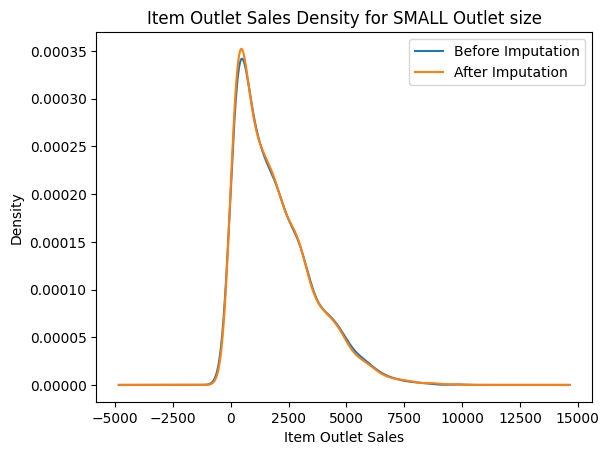

In [19]:
sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for SMALL Outlet size")
plt.legend()

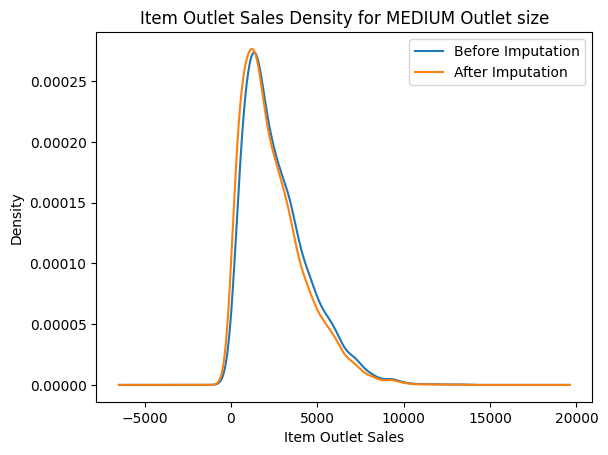

In [20]:
sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for MEDIUM Outlet size")
plt.legend()

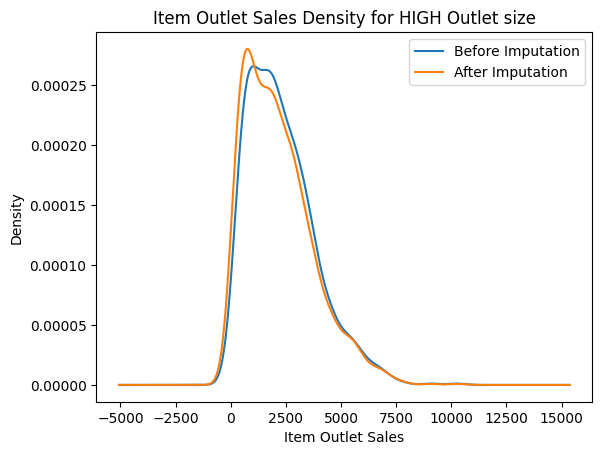

In [21]:
sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for HIGH Outlet size")
plt.legend()

In [22]:
before_imputation = sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].describe()['std']

print(f"=====SMALL OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====SMALL OUTLET SIZE======
Before Imputation Variance : 2503895.9696139977
After Imputation Variance : 2505449.629697674


In [23]:
before_imputation = sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].describe()['std']

print(f"=====MEDIUM OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====MEDIUM OUTLET SIZE======
Before Imputation Variance : 3441806.1034910944
After Imputation Variance : 3297962.5766170355


In [24]:
before_imputation = sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].describe()['std']

print(f"=====HIGH OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====HIGH OUTLET SIZE======
Before Imputation Variance : 2351719.364319561
After Imputation Variance : 2430649.7932295706


# Filling Nan for "Item_weight"

In [25]:
imputed_outlet_size.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
imputed_outlet_size.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [27]:
print("Item_Weight : ",imputed_outlet_size["Item_Weight"].dtype)

Item_Weight :  float64


In [28]:
imputed_outlet_size.shape

(8523, 12)

In [29]:
without_Nan_Item_weight = imputed_outlet_size[imputed_outlet_size.Item_Weight.isnull()==False]
without_Nan_Item_weight.shape

(7060, 12)

In [30]:
Nan_Item_weight = imputed_outlet_size[imputed_outlet_size.Item_Weight.isnull()]
Nan_Item_weight.shape

(1463, 12)

In [31]:
without_Nan_Item_weight.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
4     Household   53.8614            OUT013                       1987   
5  Baking Goods   51.4008            OUT018                       2009   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.1380  
1      Medium               Tier 3  Supermarket Type2           443.4228  
2      Medium               Tier 1  Supermarket Type1          2097.2700  
4        High               Tier 3  Supermarket Type1           994.7052  
5      Medium               Tier 3  Supermarket Type2           556.6088

In [32]:
Nan_Item_weight.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7            FDP10          NaN          Low Fat         0.127470   
18           DRI11          NaN          Low Fat         0.034238   
21           FDW12          NaN          Regular         0.035400   
23           FDC37          NaN          Low Fat         0.057557   
29           FDC14          NaN          Regular         0.072222   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7    Snack Foods  107.7622            OUT027                       1985   
18   Hard Drinks  113.2834            OUT027                       1985   
21  Baking Goods  144.5444            OUT027                       1985   
23  Baking Goods  107.6938            OUT019                       1985   
29        Canned   43.6454            OUT019                       1985   

   Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7       Medium               Tier 3  Supermarket Type3          4022.7636  
18      Medium               Tier 3  Supermarket Type3          2303.6680  
21      Medium               Tier 3  Supermarket Type3          4064.0432  
23       Small               Tier 1      Grocery Store           214.3876  
29       Small               Tier 1      Grocery Store           125.8362

## Detecting outliers

Text(0, 0.5, 'Item weight')

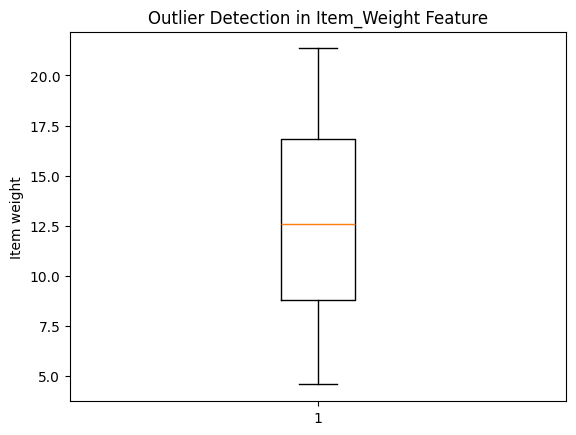

In [33]:
plt.boxplot(without_Nan_Item_weight["Item_Weight"])
plt.title("Outlier Detection in Item_Weight Feature")
plt.ylabel("Item weight")

Text(0.5, 0, 'Index')

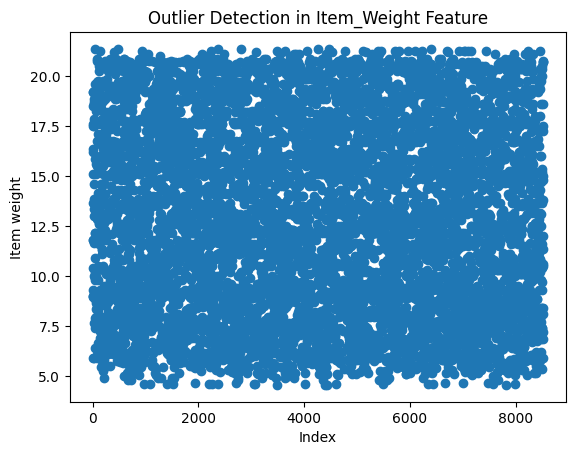

In [34]:
plt.scatter(without_Nan_Item_weight.index,without_Nan_Item_weight["Item_Weight"])
plt.title("Outlier Detection in Item_Weight Feature")
plt.ylabel("Item weight")
plt.xlabel("Index")

## ` Data is uniformily spreaded out That's why there is no Outlier detected in "Item_weight" feature`

In [35]:
random_sampled_Item_Weight= without_Nan_Item_weight.Item_Weight.sample(1463).values
random_sampled_Item_Weight

array([ 6.55 ,  7.97 ,  6.775, ...,  9.285, 20.7  , 17.35 ])

In [36]:
Nan_Item_weight["Item_Weight"] = random_sampled_Item_Weight
Nan_Item_weight["Item_Weight"].head()

C:\Users\hp\AppData\Local\Temp\ipykernel_16508\2729443437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nan_Item_weight["Item_Weight"] = random_sampled_Item_Weight


7      6.550
18     7.970
21     6.775
23    13.600
29    17.500
Name: Item_Weight, dtype: float64

In [37]:
Imputed_Item_Weight = pd.concat([without_Nan_Item_weight,Nan_Item_weight])
Imputed_Item_Weight.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

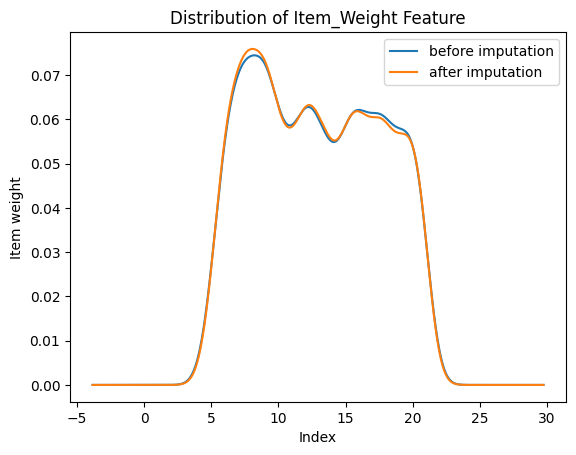

In [38]:
without_Nan_Item_weight.Item_Weight.plot.kde(label = "before imputation")
Imputed_Item_Weight.Item_Weight.plot.kde(label = "after imputation")
plt.title("Distribution of Item_Weight Feature")
plt.ylabel("Item weight")
plt.xlabel("Index")
plt.legend()

In [39]:
without_Nan_Item_weight.select_dtypes(exclude='object').corr().iloc[:1,1:]

Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
Item_Weight        -0.014048  0.027141                  -0.011588   

             Item_Outlet_Sales  
Item_Weight           0.014123

In [40]:
Imputed_Item_Weight.select_dtypes(exclude='object').corr().iloc[:1,1:]

Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
Item_Weight        -0.010516  0.026052                   0.003636   

             Item_Outlet_Sales  
Item_Weight           0.007861

In [41]:
before_imputation = without_Nan_Item_weight['Item_Weight'].describe()['std']
after_imputation = Imputed_Item_Weight['Item_Weight'].describe()['std']

print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

Before Imputation Variance : 21.56168825983656
After Imputation Variance : 21.513498030573732


# Data Visualisation for outlier detection

In [42]:
Imputed_sales_df = Imputed_Item_Weight.copy()
Imputed_sales_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
4     Household   53.8614            OUT013                       1987   
5  Baking Goods   51.4008            OUT018                       2009   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.1380  
1      Medium               Tier 3  Supermarket Type2           443.4228  
2      Medium               Tier 1  Supermarket Type1          2097.2700  
4        High               Tier 3  Supermarket Type1           994.7052  
5      Medium               Tier 3  Supermarket Type2           556.6088

In [43]:
numerical_attributes = Imputed_sales_df.select_dtypes(exclude='object')
numerical_attributes.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0        9.300         0.016047  249.8092                       1999   
1        5.920         0.019278   48.2692                       2009   
2       17.500         0.016760  141.6180                       1999   
4        8.930         0.000000   53.8614                       1987   
5       10.395         0.000000   51.4008                       2009   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
4           994.7052  
5           556.6088

In [110]:
object_attributes = Imputed_sales_df.select_dtypes(include='object')
object_attributes.head()

Item_Identifier Item_Fat_Content     Item_Type Outlet_Identifier  \
0           FDA15          Low Fat         Dairy            OUT049   
1           DRC01          Regular   Soft Drinks            OUT018   
2           FDN15          Low Fat          Meat            OUT049   
4           NCD19          Low Fat     Household            OUT013   
5           FDP36          Regular  Baking Goods            OUT018   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
4        High               Tier 3  Supermarket Type1  
5      Medium               Tier 3  Supermarket Type2

## Numerical Features Outlier detection and treatment

In [111]:
numerical_attributes.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.823759         0.063594   140.992782                1997.831867   
std       4.638265         0.045918    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.710000         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.750000         0.094576   185.643700                2004.000000   
max      21.350000         0.195721   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

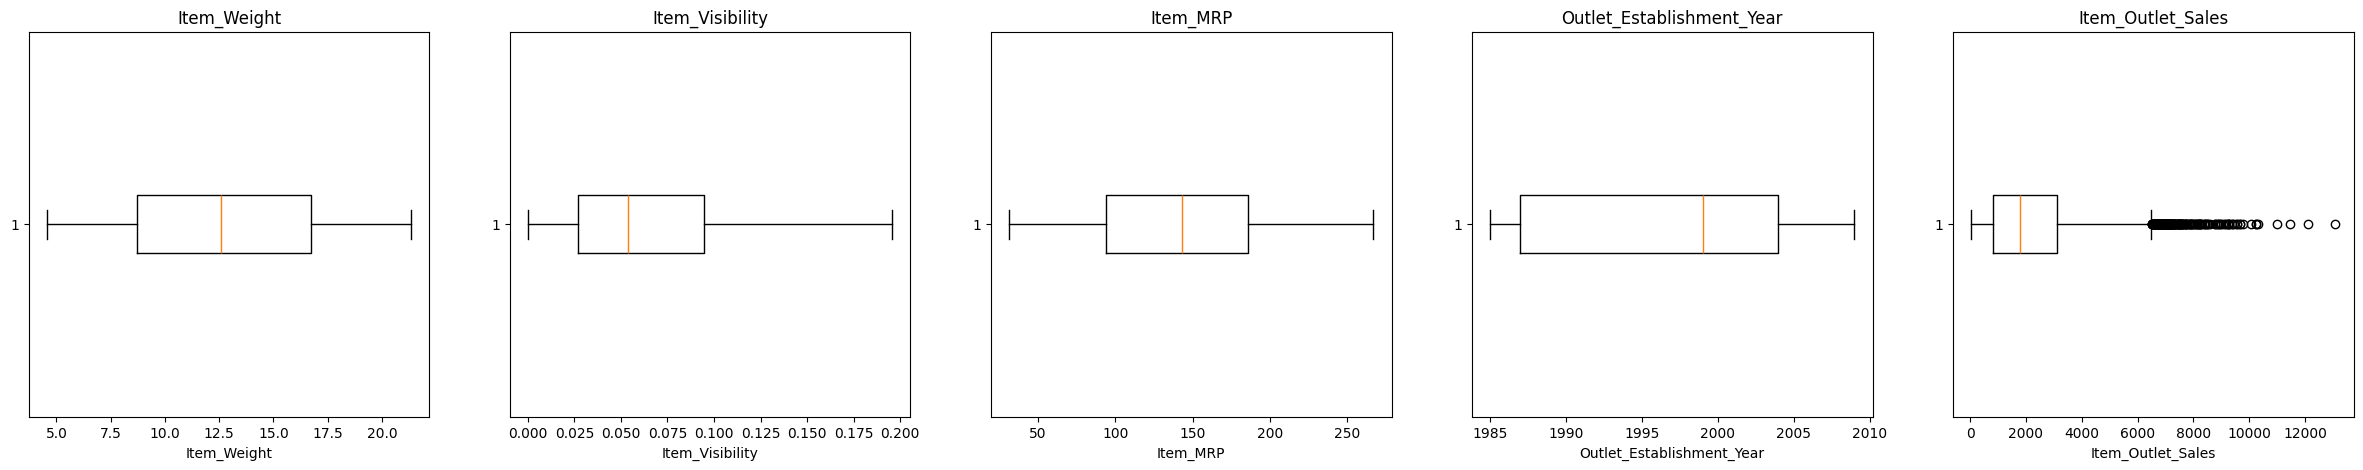

In [112]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)
    plt.boxplot(numerical_attributes[col],vert=False)
    plt.title(col)
    plt.xlabel(col)

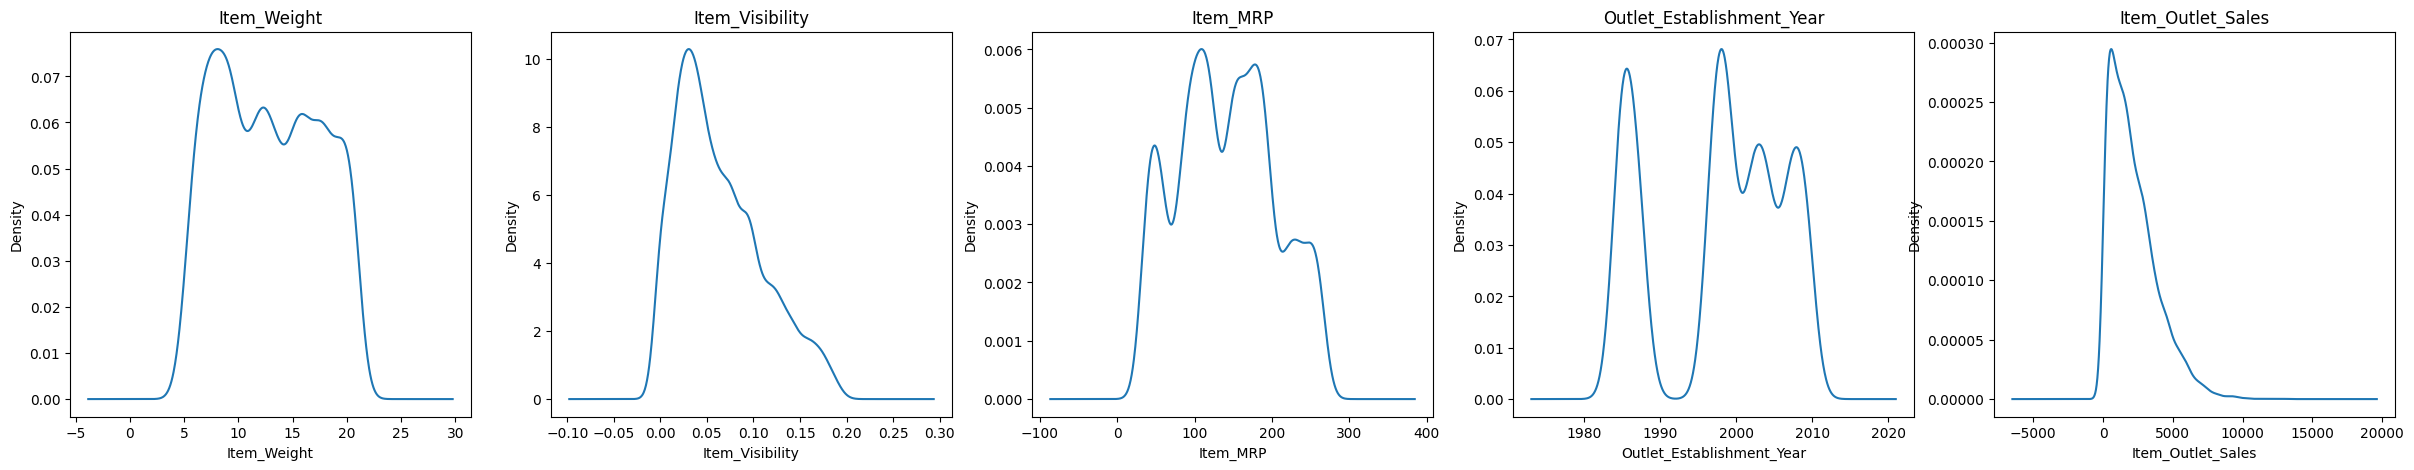

In [113]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)
    numerical_attributes[col].plot.kde()
    plt.title(col)
    plt.xlabel(col)

## `From above boxplot and kde plots we can say that there is indication of good coorelation between the "Item_Visibilty" and "Item_Outlet_Sales"`.

## `"Item_Visibilty" and "Item_Outlet_Sales" are looking similar in their distribution and also in terms of outliers, It might be the indication of useful Outliers which should not be removed`

<Axes: >

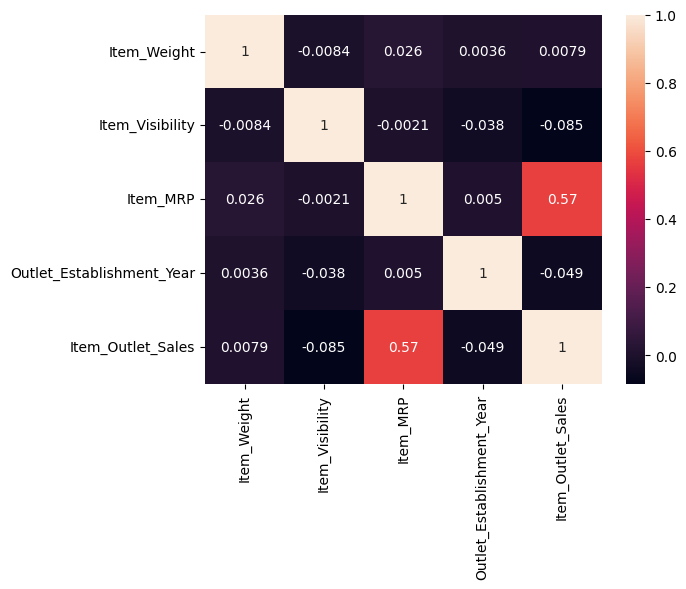

In [114]:
import seaborn as sns 

sns.heatmap(numerical_attributes.corr(),annot=True)

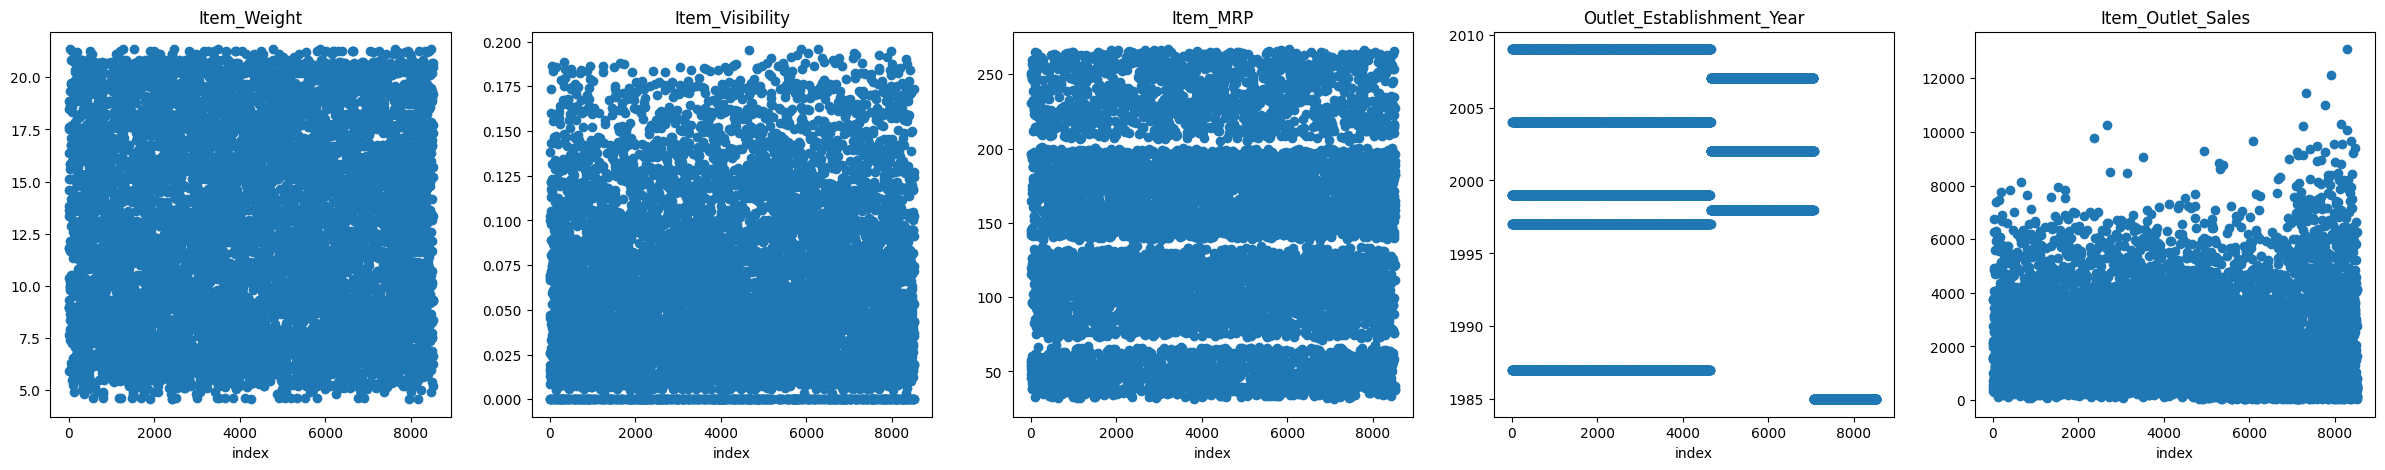

In [115]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)

    x =  range(1,numerical_attributes.shape[0]+1)
    y = numerical_attributes[col]
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel("index")

## `From above heatmap and scatter plot we clearify that their is less correlation between "Item_Visibility" and "Item_Outlet_Sales"` 

## `It means we need to do TREATMENT for outliers`

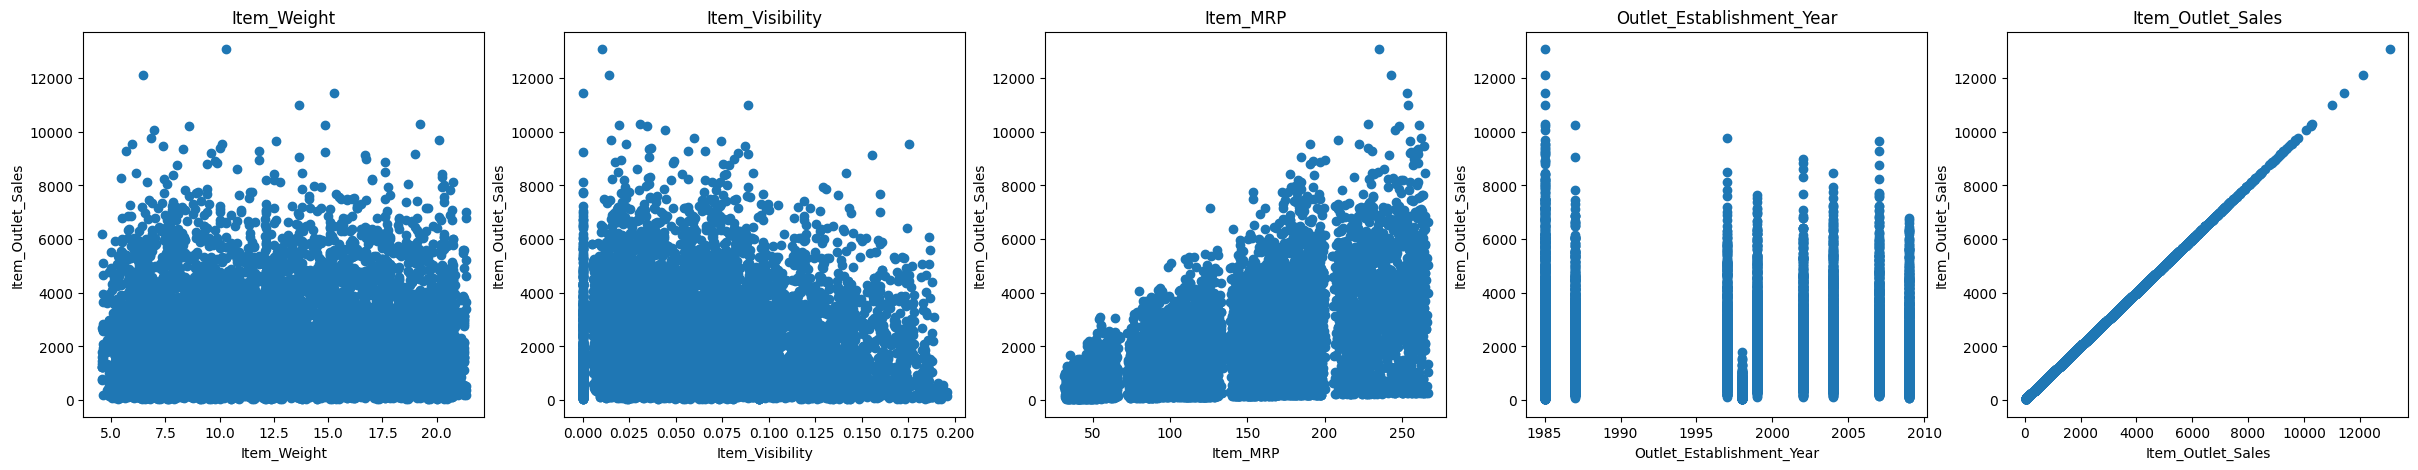

In [116]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)

    x = numerical_attributes[col]
    y =  numerical_attributes["Item_Outlet_Sales"]
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Item_Outlet_Sales")

In [117]:
import numpy as np

In [118]:
q1 = numerical_attributes["Item_Visibility"].quantile(0.25)
q3 = numerical_attributes["Item_Visibility"].quantile(0.75)

iqr = q3-q1

numerical_attributes["Item_Visibility"] = np.where(numerical_attributes["Item_Visibility"]>(q3+iqr*1.5),q3,
                                        np.where(numerical_attributes["Item_Visibility"]<(q1-iqr*1.5),q1,numerical_attributes["Item_Visibility"]))

Text(0, 0.5, 'Item_Outlet_Sales')

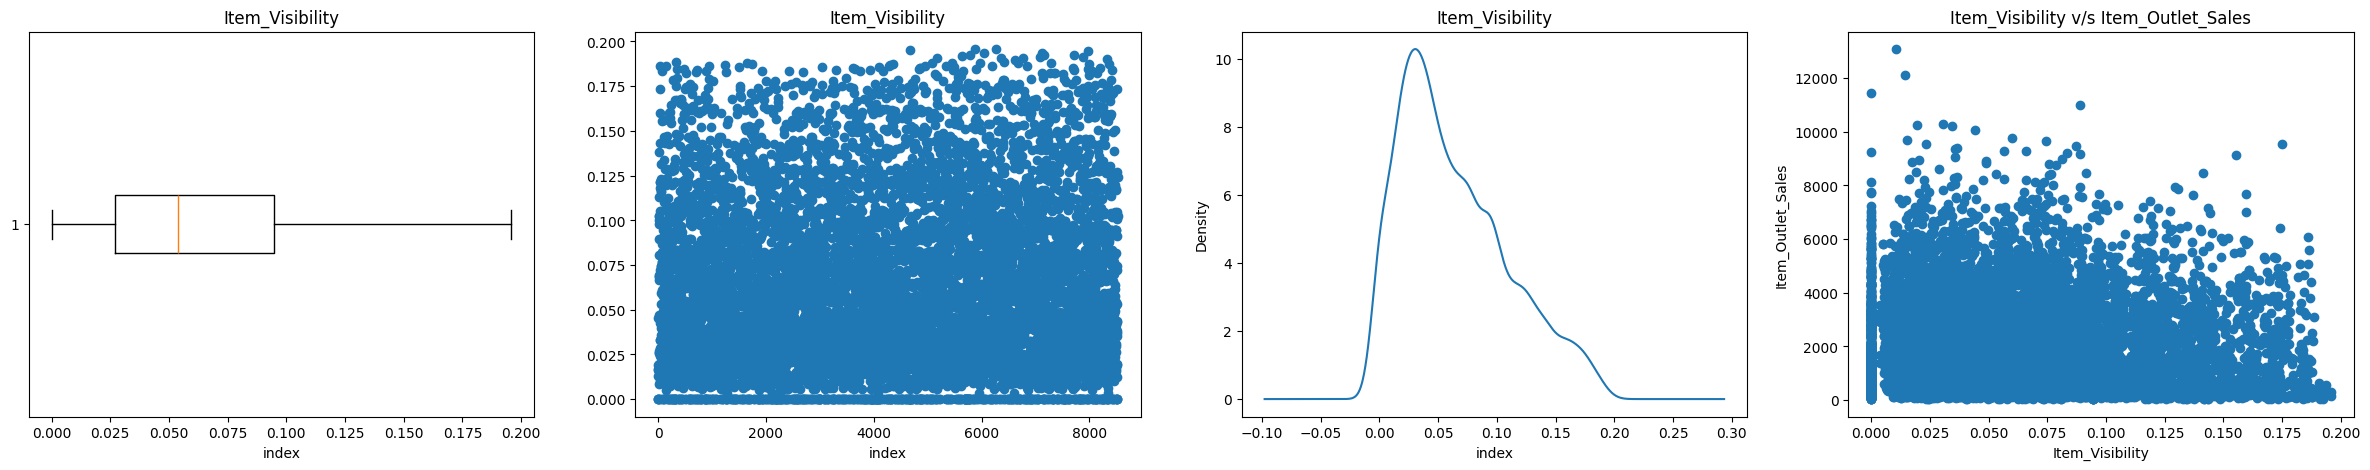

In [119]:
plt.figure(figsize = (30,5))

plt.subplot(1,4,1)
plt.boxplot(numerical_attributes["Item_Visibility"],vert=False)
plt.title("Item_Visibility")
plt.xlabel("index")

plt.subplot(1,4,2)
x = range(1,numerical_attributes.shape[0]+1)
y = numerical_attributes["Item_Visibility"]
plt.scatter(x,y)
plt.title("Item_Visibility")
plt.xlabel("index")

plt.subplot(1,4,3)
numerical_attributes["Item_Visibility"].plot.kde()
plt.title("Item_Visibility")
plt.xlabel("index")

plt.subplot(1,4,4)
x = numerical_attributes["Item_Visibility"]
y =  numerical_attributes["Item_Outlet_Sales"]
plt.scatter(x,y)
plt.title("Item_Visibility v/s Item_Outlet_Sales")
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")

<Axes: >

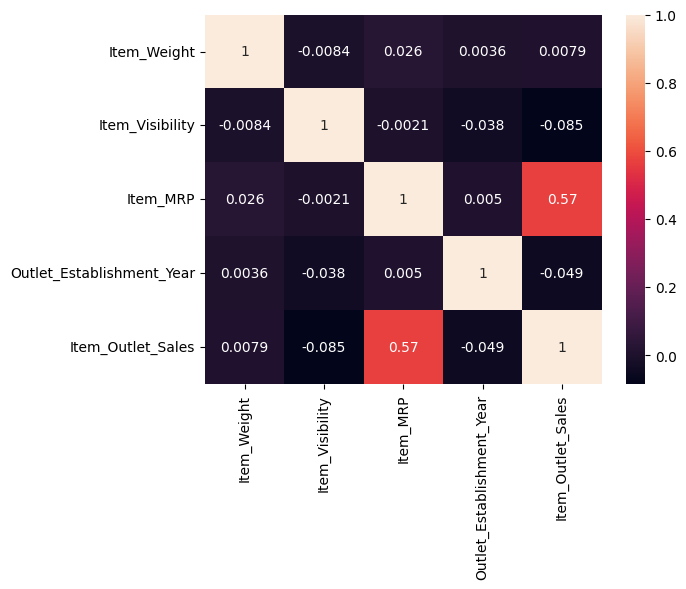

In [120]:
sns.heatmap(numerical_attributes.corr(),annot=True)

## `Using IQR method of treating outlier has reduced correlation between "Item_Visibilty" and "Item_Outlet_Sales"` 

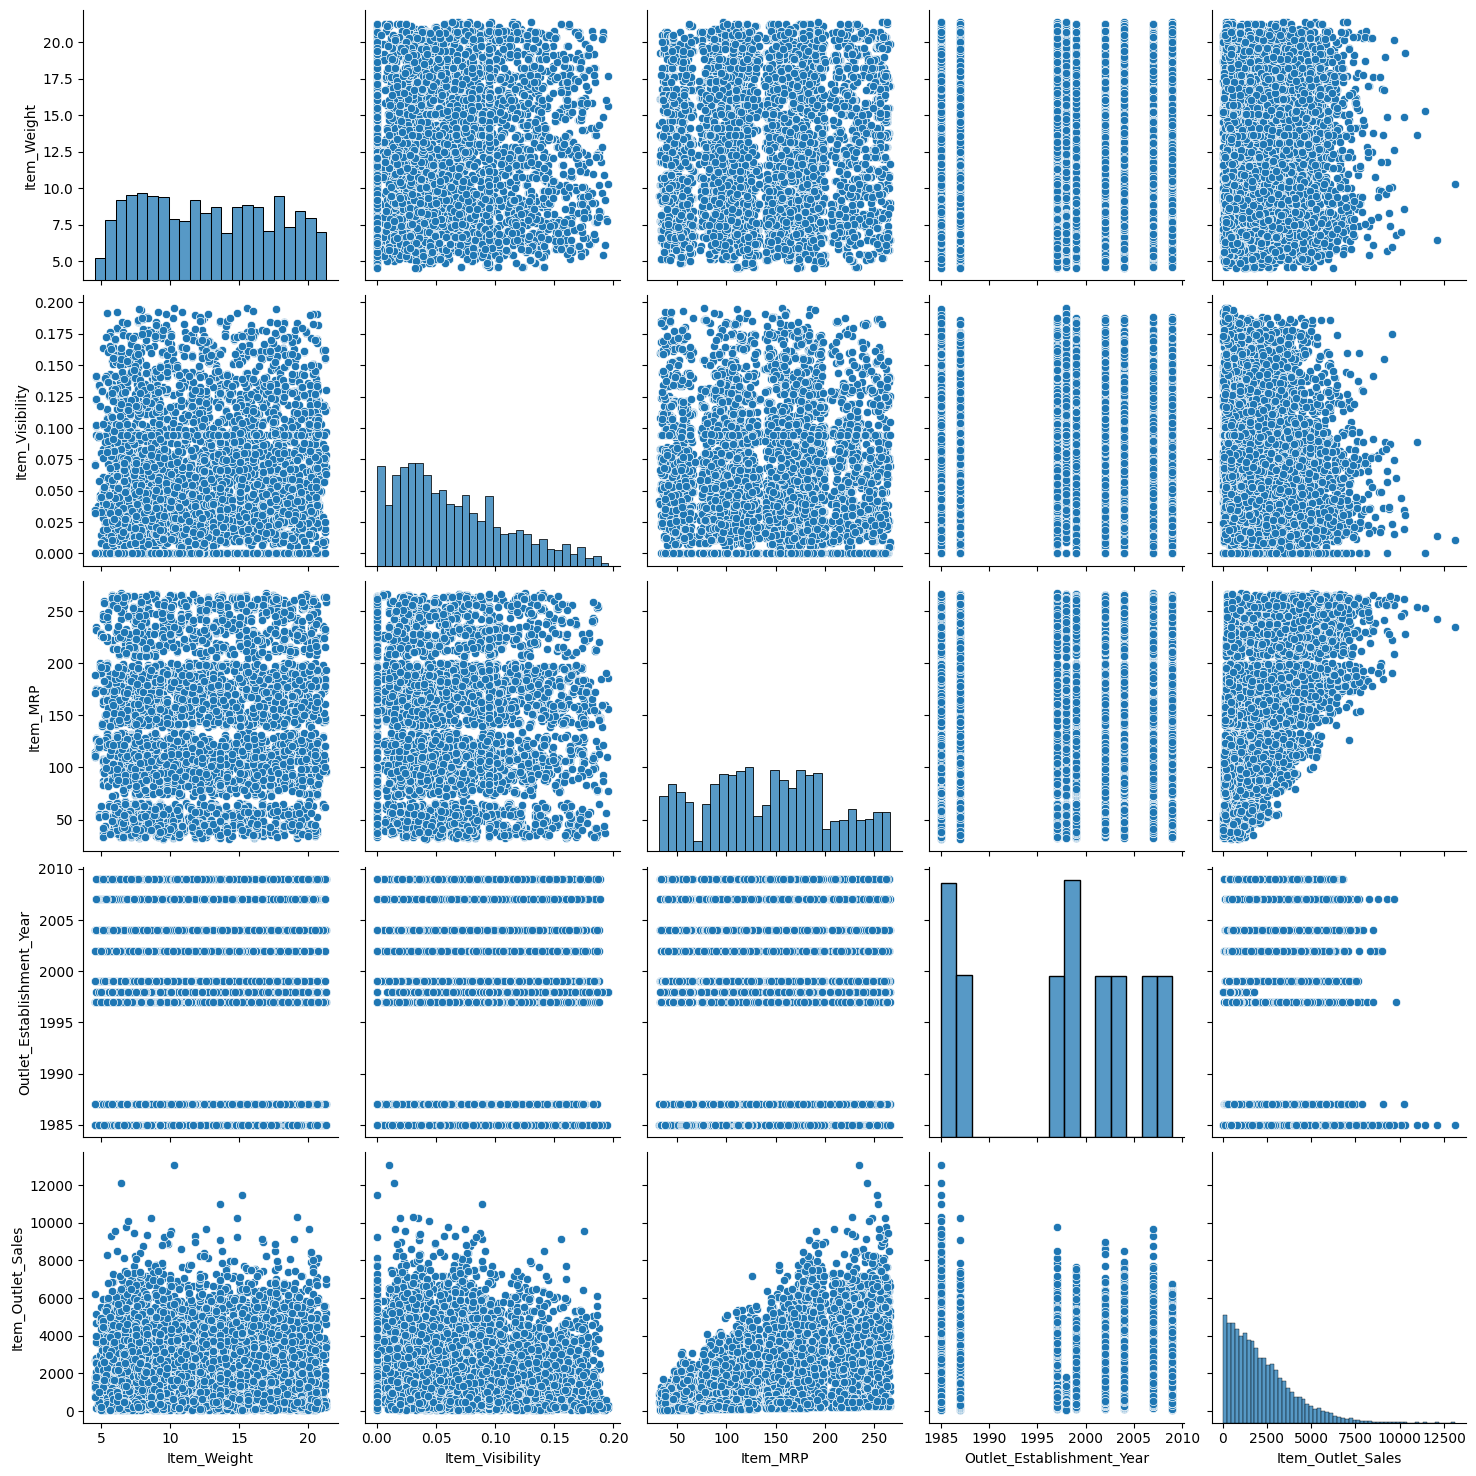

In [121]:
sns.pairplot(numerical_attributes,height=3)

In [122]:
object_attributes.head()

Item_Identifier Item_Fat_Content     Item_Type Outlet_Identifier  \
0           FDA15          Low Fat         Dairy            OUT049   
1           DRC01          Regular   Soft Drinks            OUT018   
2           FDN15          Low Fat          Meat            OUT049   
4           NCD19          Low Fat     Household            OUT013   
5           FDP36          Regular  Baking Goods            OUT018   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
4        High               Tier 3  Supermarket Type1  
5      Medium               Tier 3  Supermarket Type2

In [123]:
object_attributes.drop("Item_Identifier",axis=1,inplace=True)
object_attributes.head()

Item_Fat_Content     Item_Type Outlet_Identifier Outlet_Size  \
0          Low Fat         Dairy            OUT049      Medium   
1          Regular   Soft Drinks            OUT018      Medium   
2          Low Fat          Meat            OUT049      Medium   
4          Low Fat     Household            OUT013        High   
5          Regular  Baking Goods            OUT018      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 3  Supermarket Type2  
2               Tier 1  Supermarket Type1  
4               Tier 3  Supermarket Type1  
5               Tier 3  Supermarket Type2

## `Dropped "Item_Identifier" due to risk at production level testing, which can be done for different Item Identifier which is not in "Item_Identifier"`

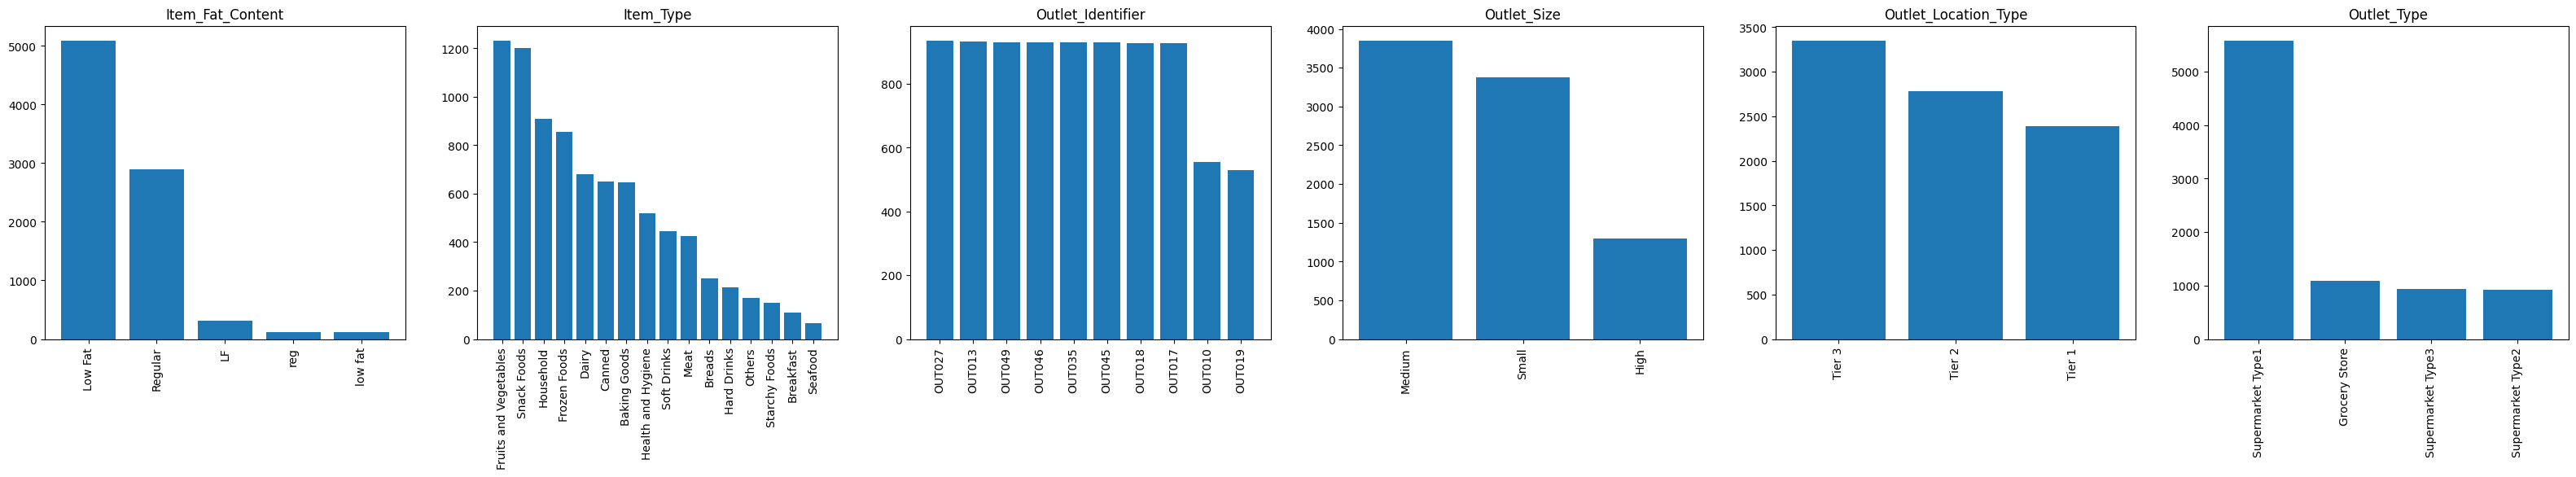

In [124]:
plt.figure(figsize = (40,5))

columns = object_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,6,idx+1)
    x = object_attributes[col].value_counts().index.values
    y = object_attributes[col].value_counts()
    plt.bar(x,y)
    plt.title(col)
    plt.xticks(rotation = 90)                   

In [126]:
object_attributes.insert(object_attributes.shape[1],"Item_Outlet_Sales",numerical_attributes["Item_Outlet_Sales"])
object_attributes.head()

Item_Fat_Content     Item_Type Outlet_Identifier Outlet_Size  \
0          Low Fat         Dairy            OUT049      Medium   
1          Regular   Soft Drinks            OUT018      Medium   
2          Low Fat          Meat            OUT049      Medium   
4          Low Fat     Household            OUT013        High   
5          Regular  Baking Goods            OUT018      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
4               Tier 3  Supermarket Type1           994.7052  
5               Tier 3  Supermarket Type2           556.6088

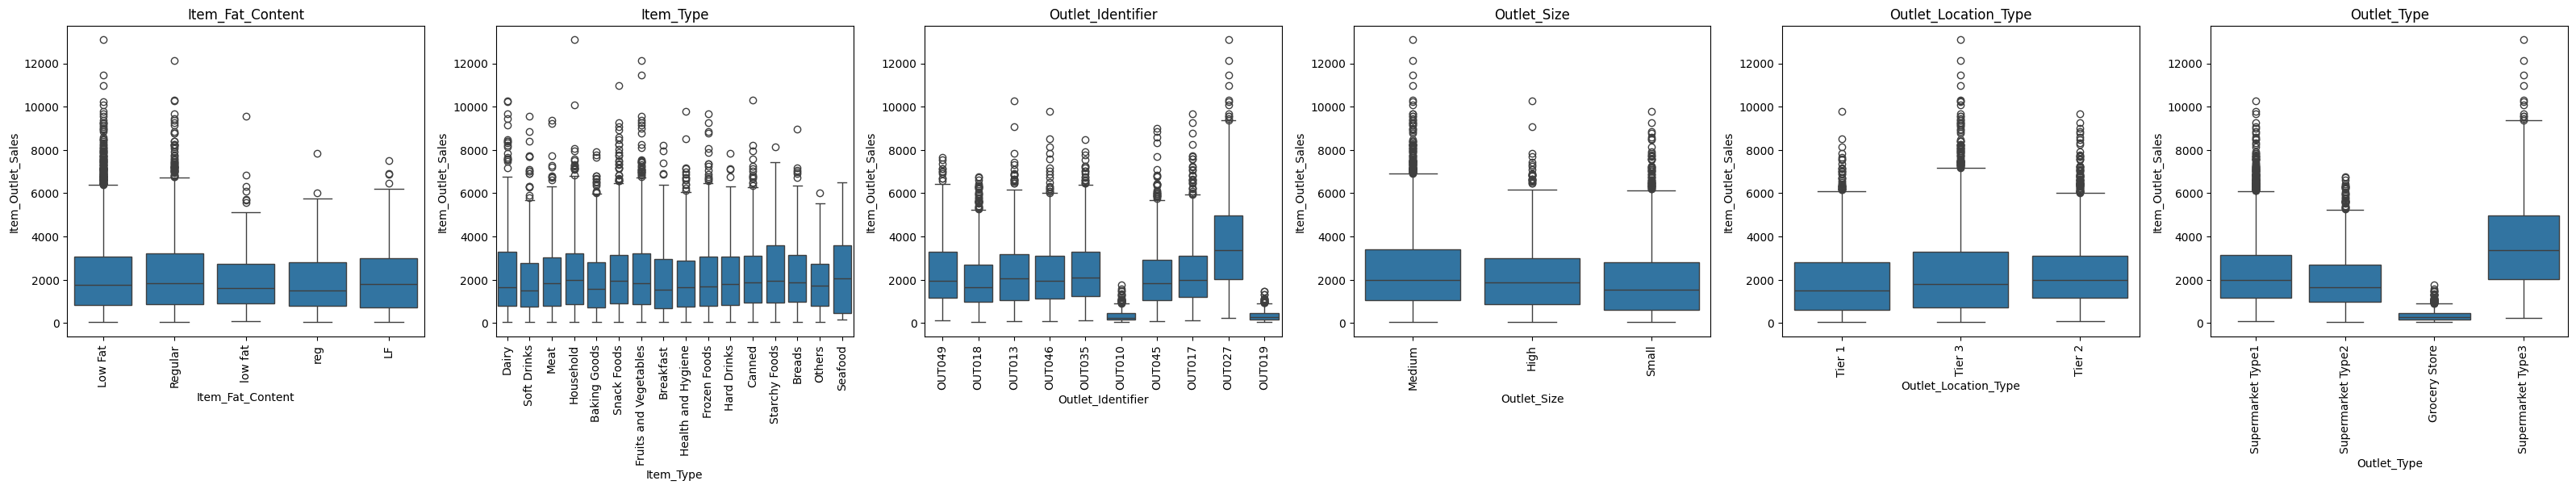

In [127]:
plt.figure(figsize = (40,5))

columns = object_attributes.columns[:-1]

for idx,col in enumerate(columns):
    plt.subplot(1,6,idx+1)
    sns.boxplot(data = object_attributes,x = col,y='Item_Outlet_Sales')
    plt.title(col)
    plt.xticks(rotation = 90)                   

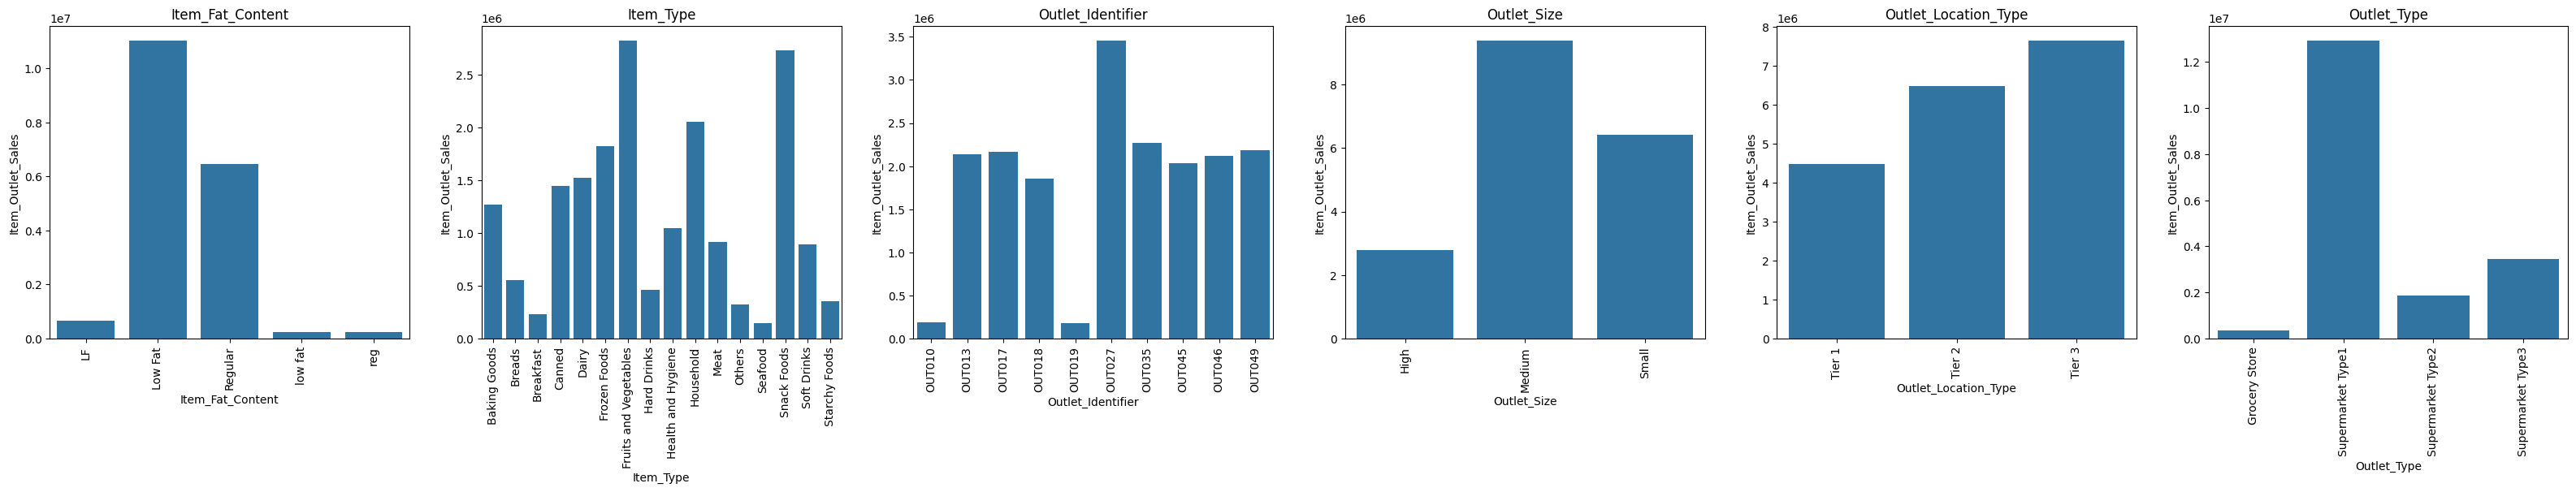

In [128]:
plt.figure(figsize = (40,5))

columns = object_attributes.columns[:-1]

for idx,col in enumerate(columns):
    plt.subplot(1,6,idx+1)
    data=object_attributes.groupby(col).sum("Item_Outlet_Sales")
    sns.barplot(x = data.index,y = data.Item_Outlet_Sales)
    plt.title(col)
    plt.xticks(rotation = 90)                   



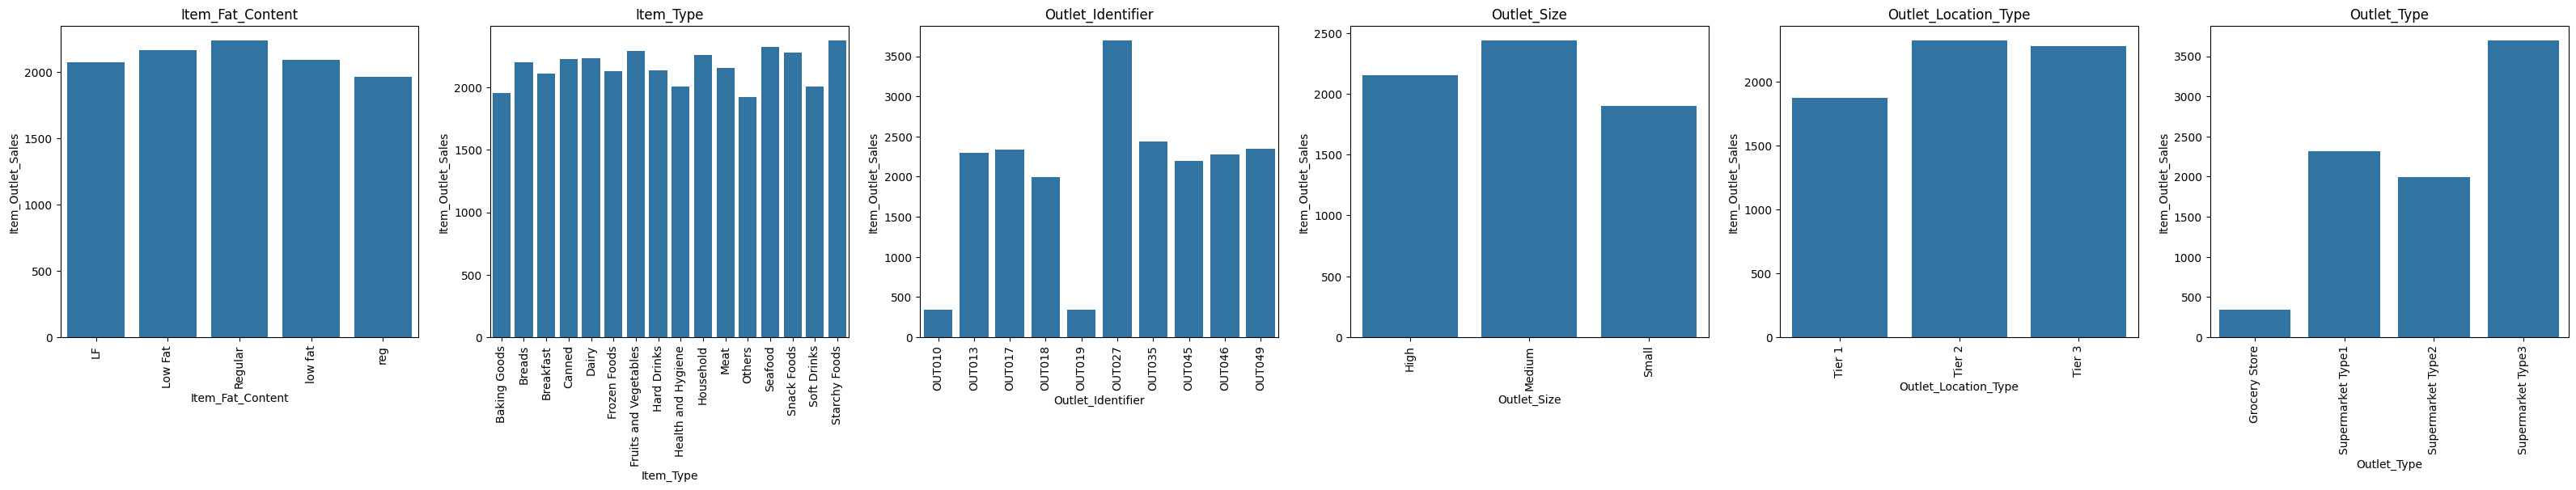

In [129]:
plt.figure(figsize = (40,5))

columns = object_attributes.columns[:-1]

for idx,col in enumerate(columns):
    plt.subplot(1,6,idx+1)
    data=object_attributes.groupby(col).mean("Item_Outlet_Sales")
    sns.barplot(x = data.index,y = data.Item_Outlet_Sales)
    plt.title(col)
    plt.xticks(rotation = 90)                   



In [132]:
object_attributes.head()

Item_Fat_Content     Item_Type Outlet_Identifier Outlet_Size  \
0          Low Fat         Dairy            OUT049      Medium   
1          Regular   Soft Drinks            OUT018      Medium   
2          Low Fat          Meat            OUT049      Medium   
4          Low Fat     Household            OUT013        High   
5          Regular  Baking Goods            OUT018      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
4               Tier 3  Supermarket Type1           994.7052  
5               Tier 3  Supermarket Type2           556.6088

c:\Users\hp\Desktop\Projects\Big-Mart-Sales-Prediction\Environment\lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
C:\Users\hp\AppData\Local\Temp\ipykernel_16508\232204888.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = Imputed_sales_df,x = num_col,hue = obj_col,kind='kde')
C:\Users\hp\AppData\Local\Temp\ipykernel_16508\232204888.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = Imputed_sales_df,x = num_col,hue = obj_col,kind='kde')


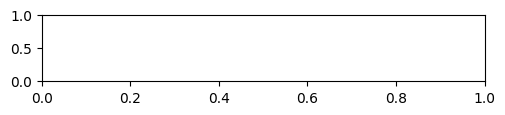

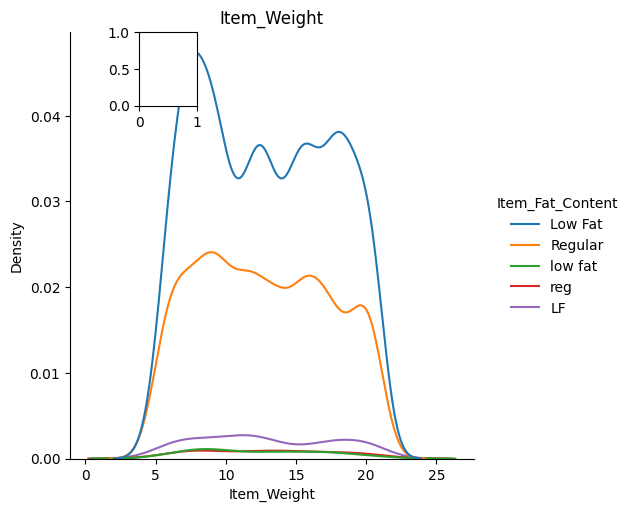

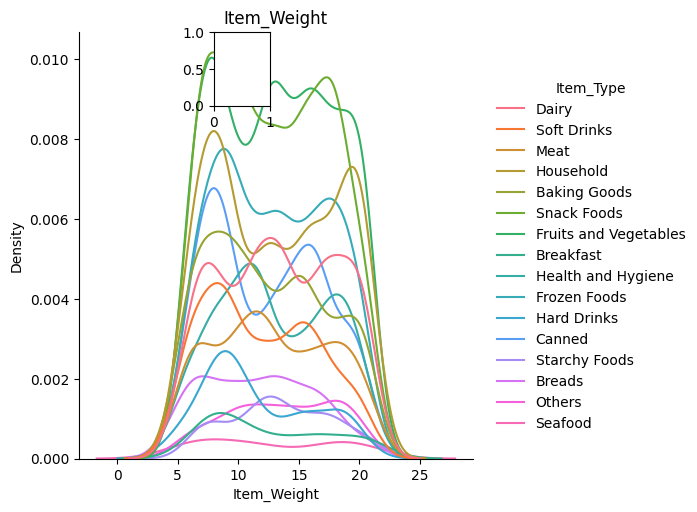

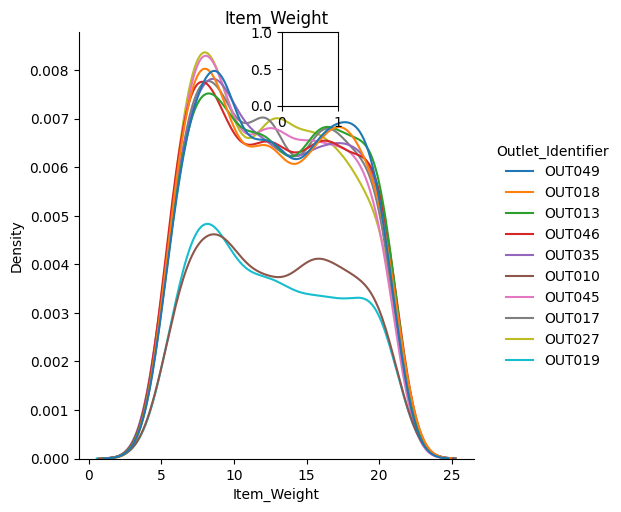

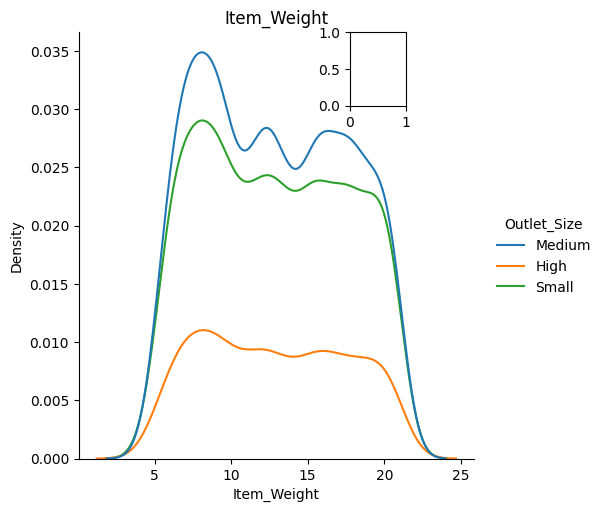

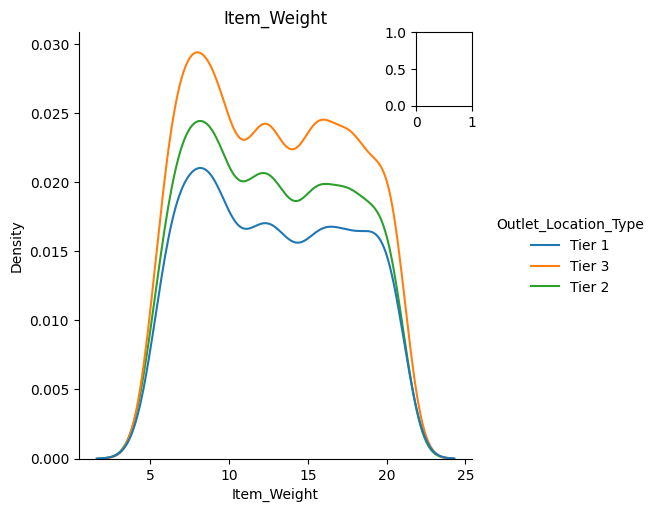

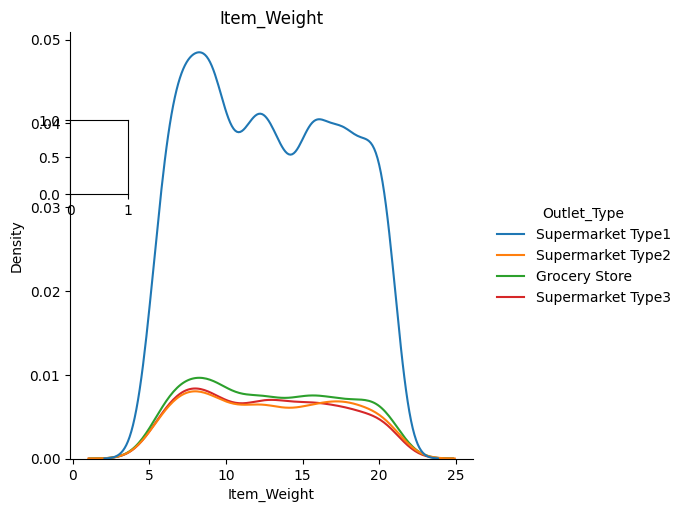

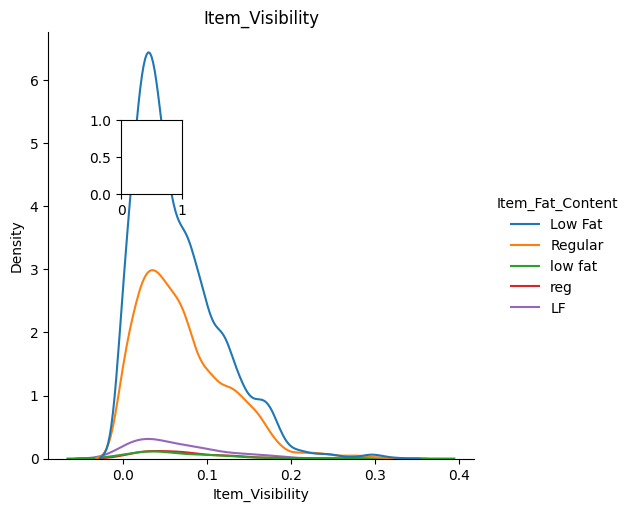

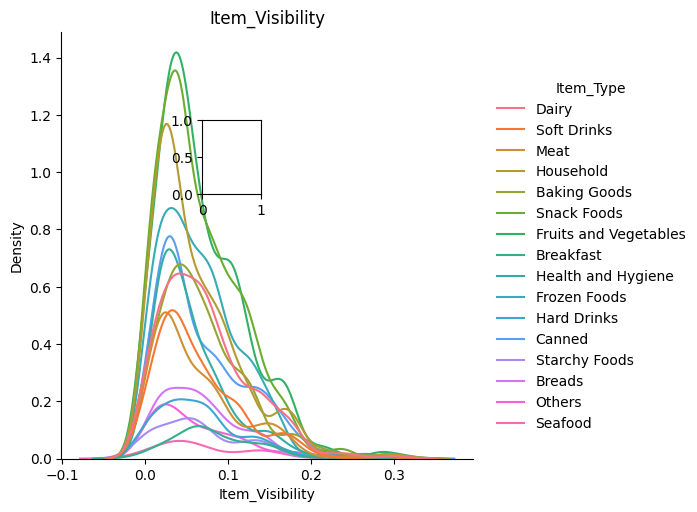

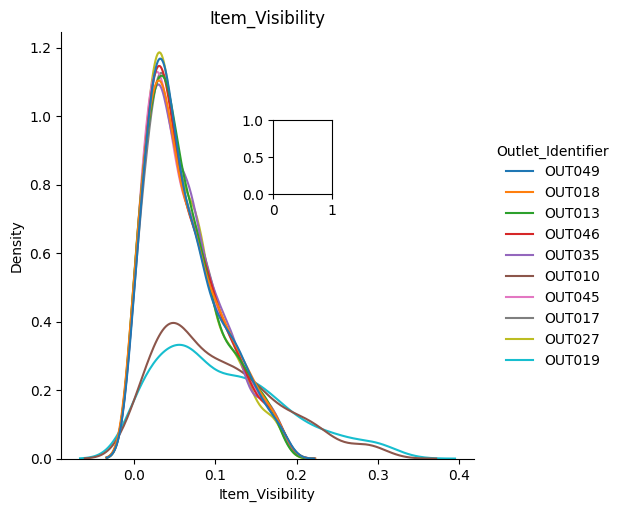

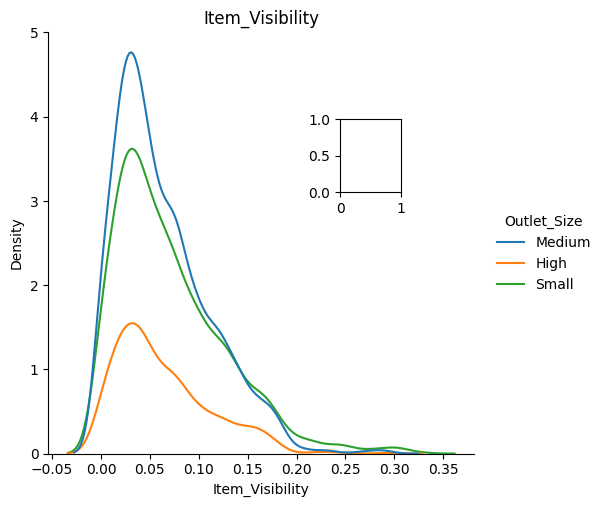

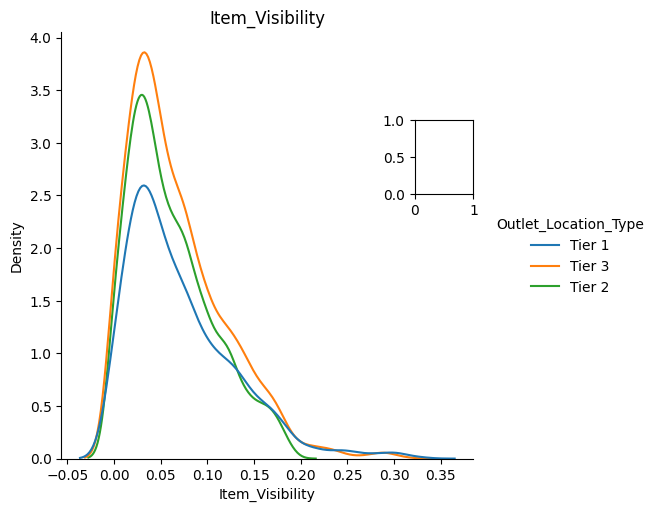

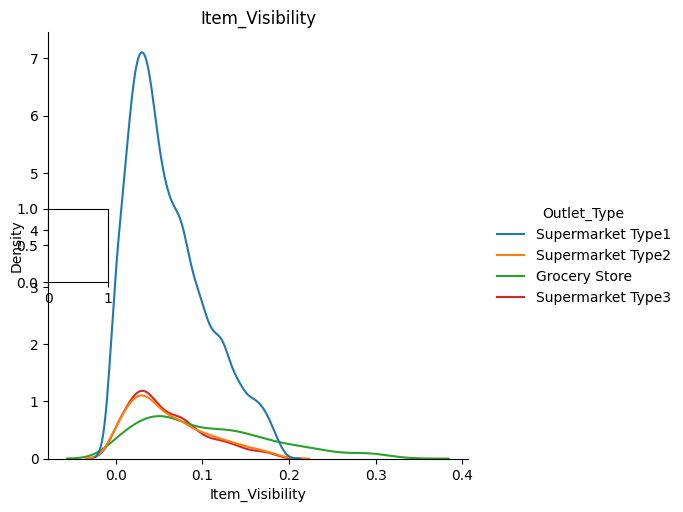

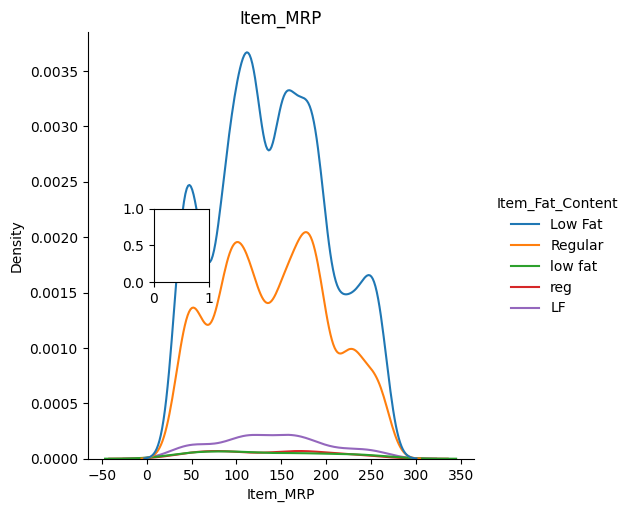

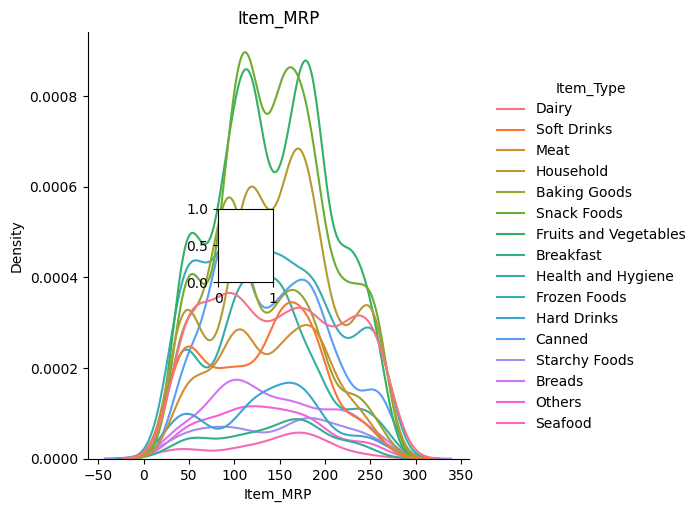

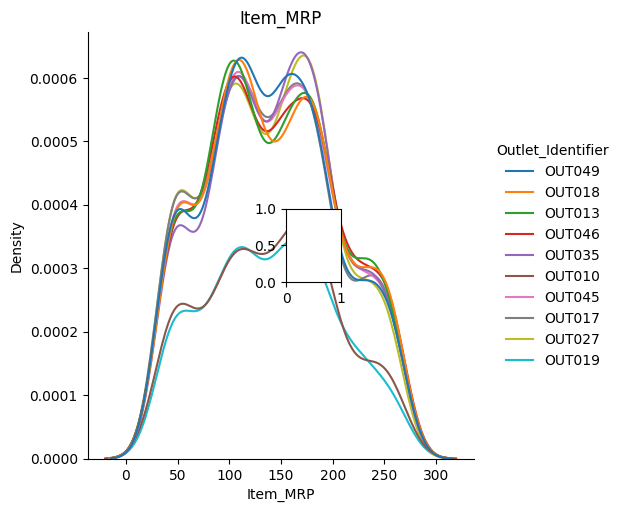

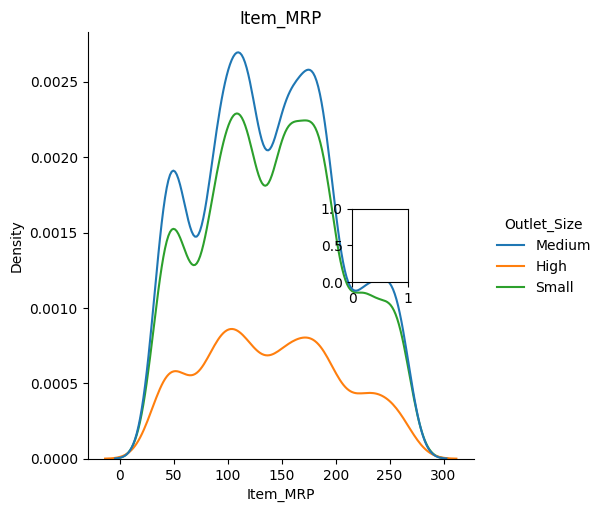

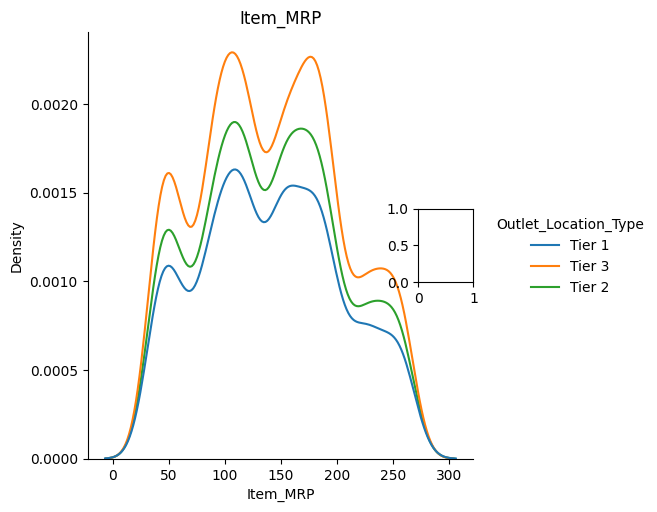

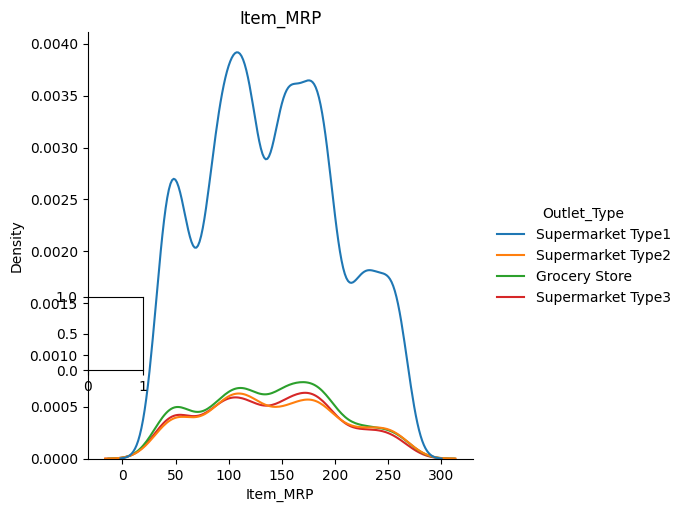

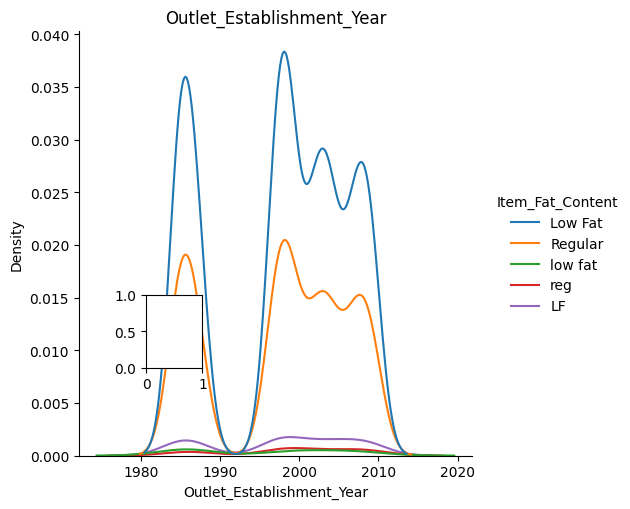

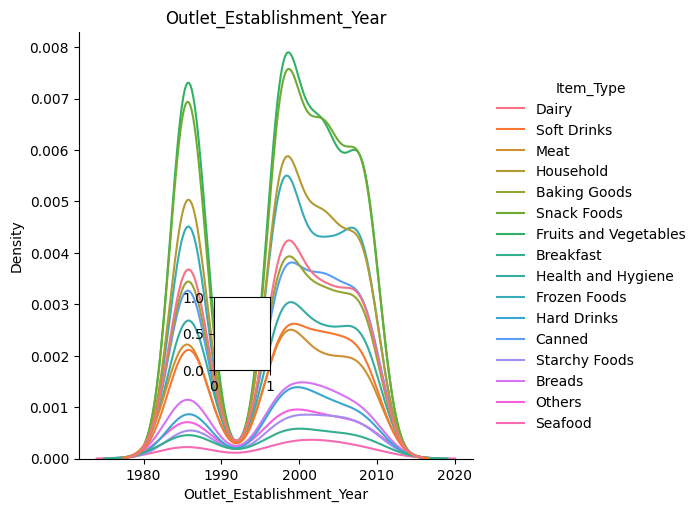

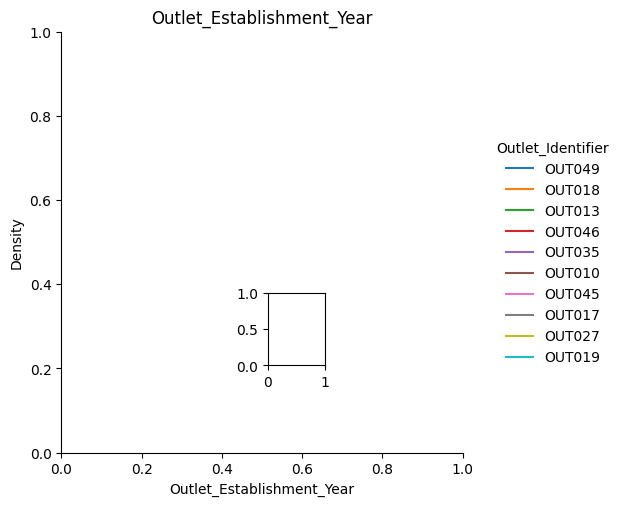

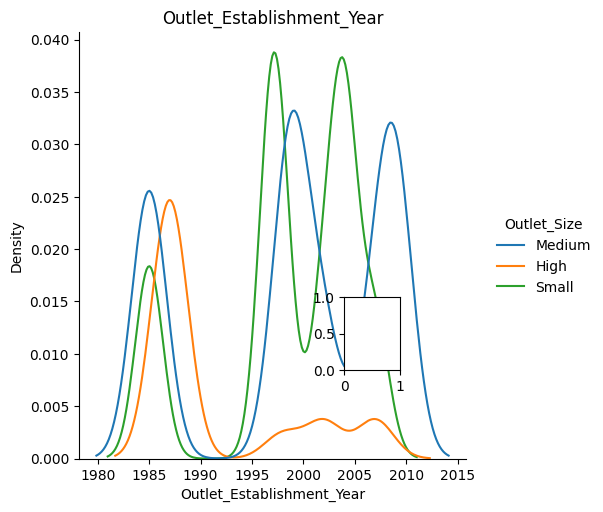

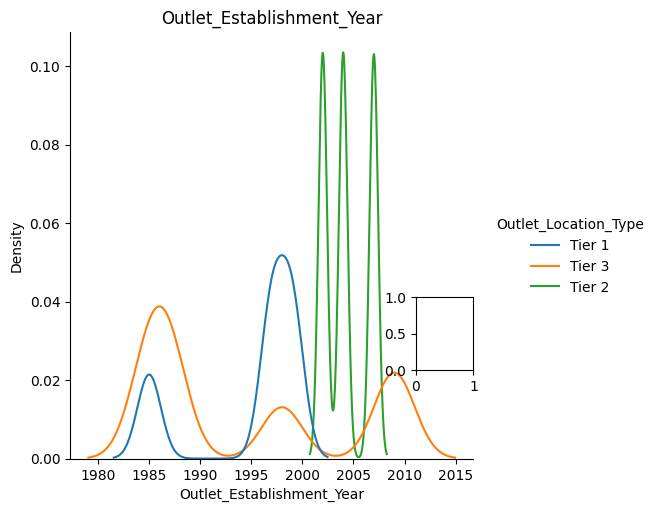

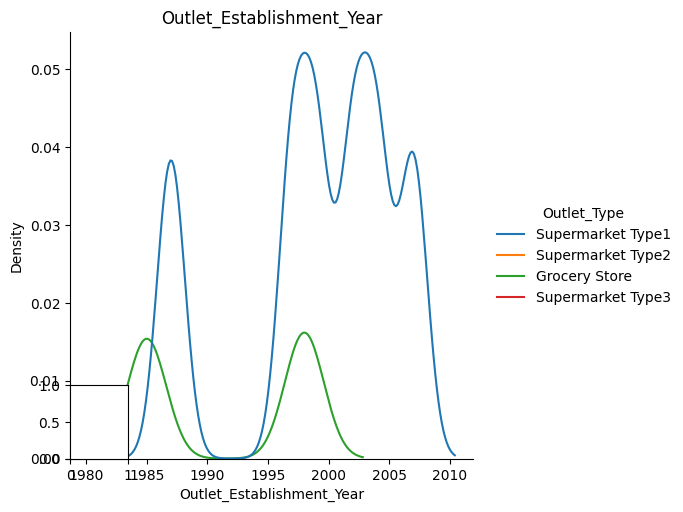

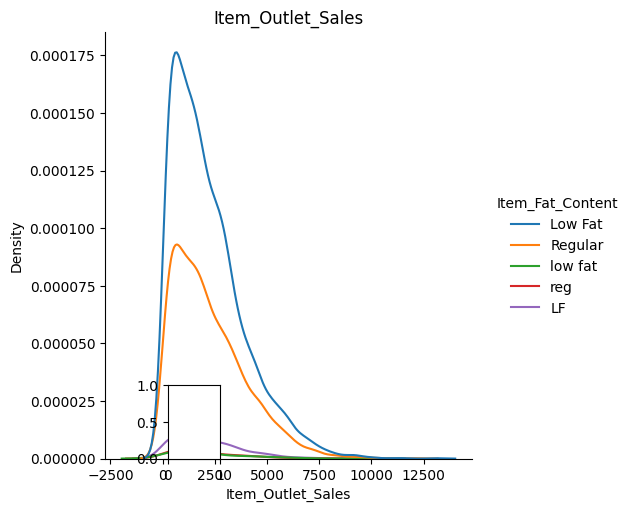

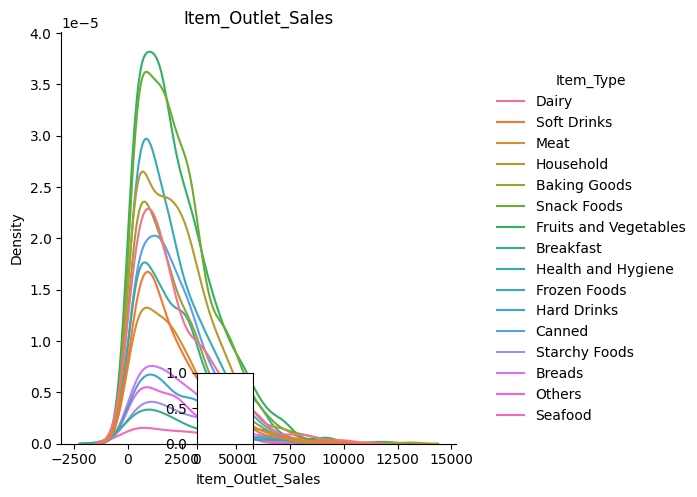

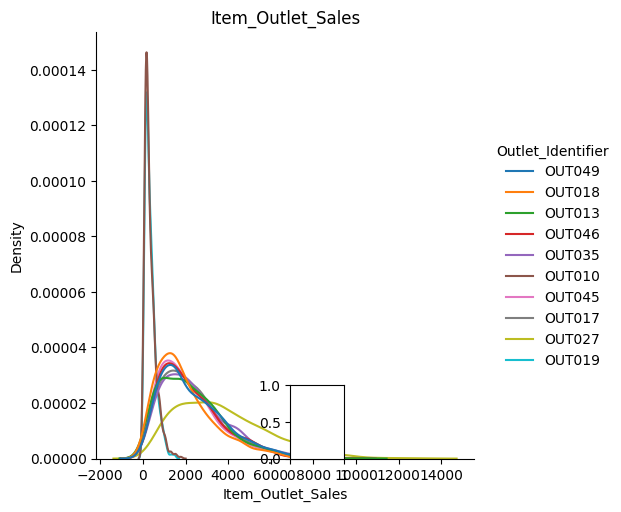

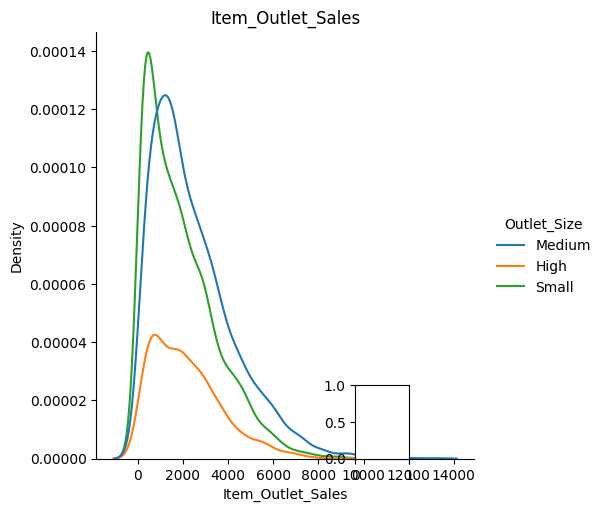

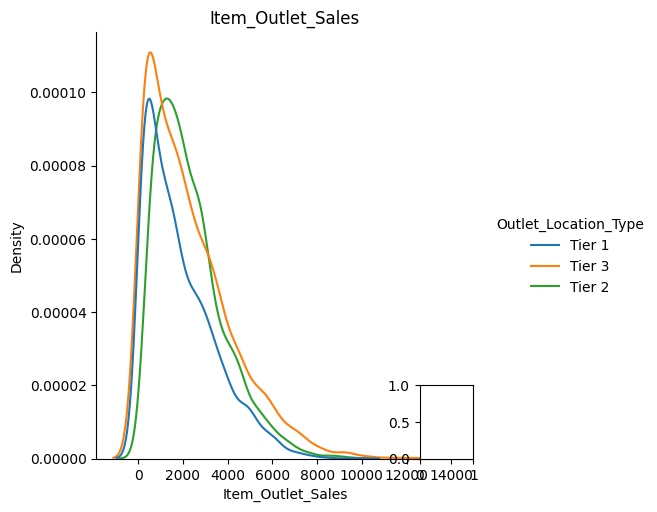

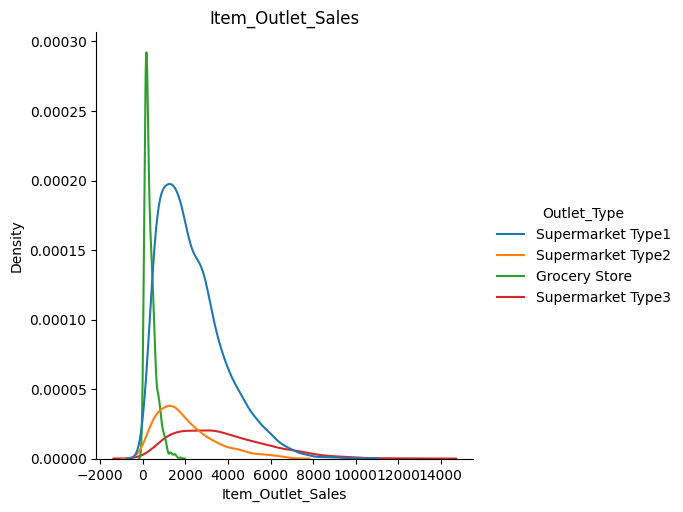

In [165]:
plt.figure(figsize = (40,5))

object_columns = object_attributes.columns[:-1]
numerical_columns = numerical_attributes.columns

idx = 0
for num_col in numerical_columns:
    for obj_col in object_columns: 
        plt.subplot(5,6,idx+1)
        sns.displot(data = Imputed_sales_df,x = num_col,hue = obj_col,kind='kde')
        plt.title(num_col)
        idx+=1
                    


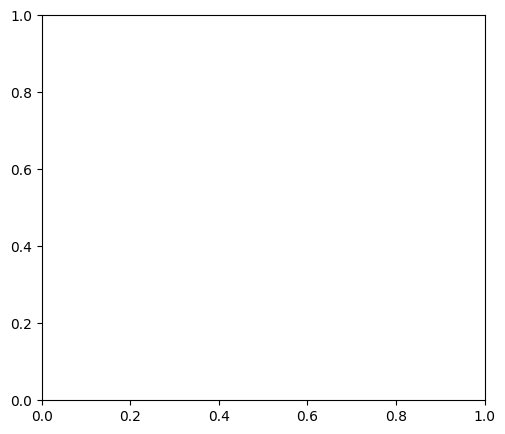

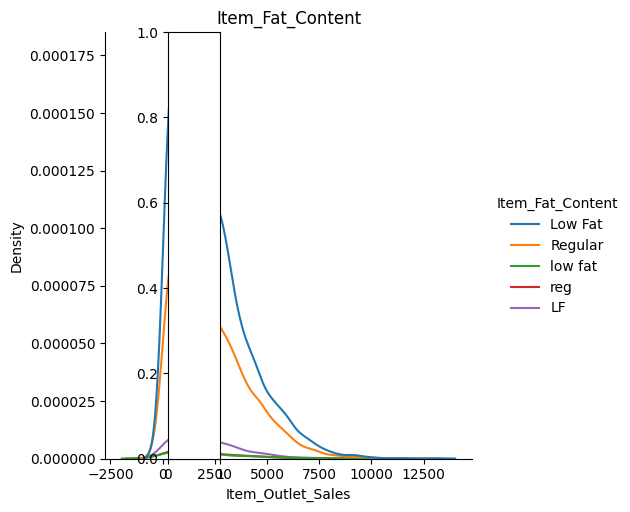

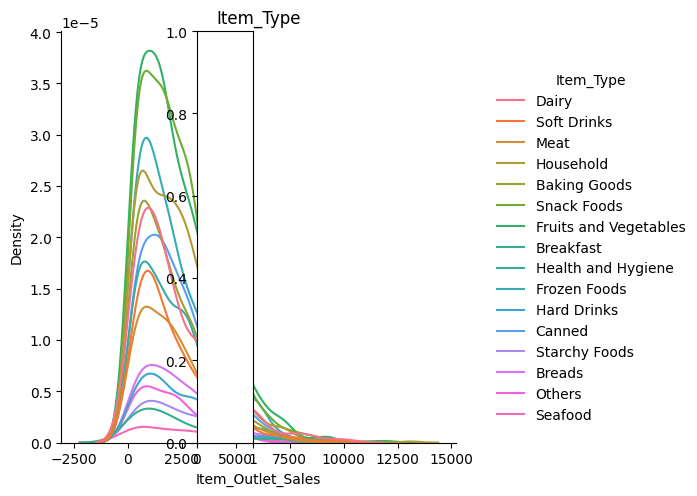

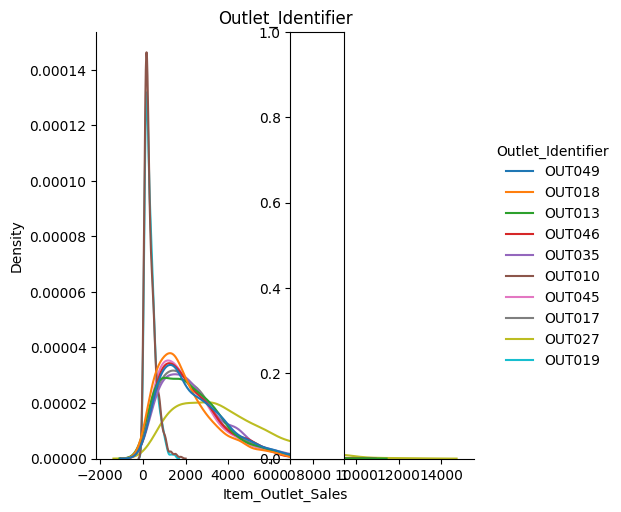

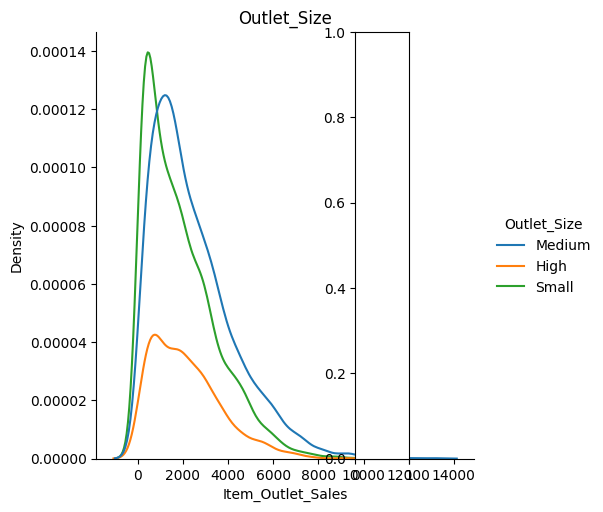

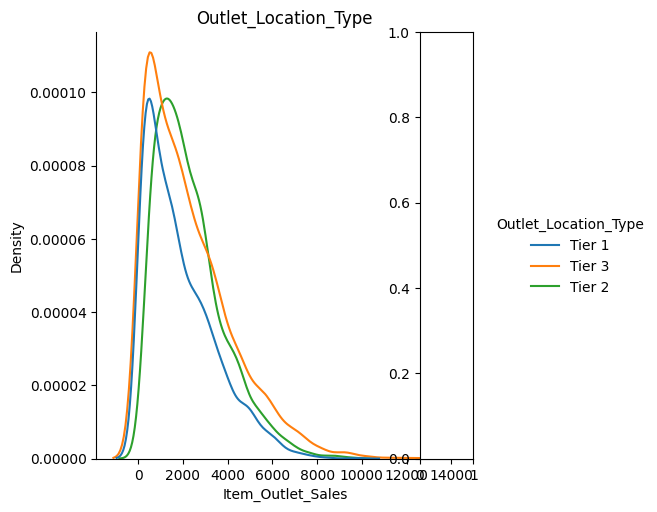

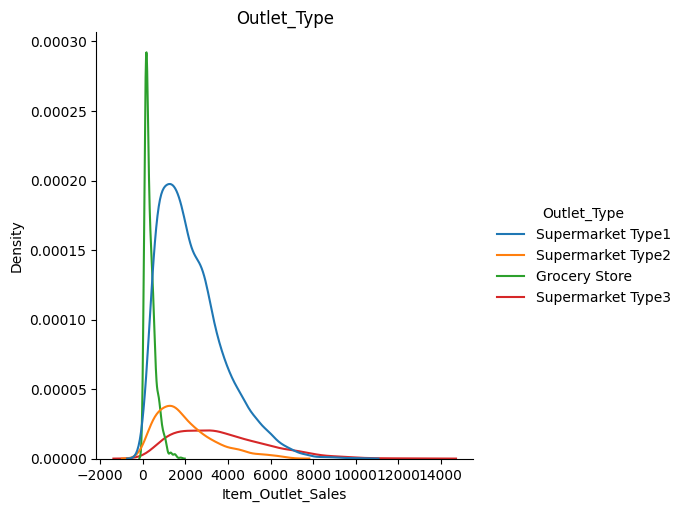

In [162]:
plt.figure(figsize = (40,5))

columns = object_attributes.columns[:-1]

for idx,col in enumerate(columns):
    plt.subplot(1,6,idx+1)
    sns.displot(data = object_attributes,x = "Item_Outlet_Sales",hue = col,kind='kde')
    plt.title(col)
                     





In [77]:
import pingouin as pg
from scipy import stats

In [78]:
all_welch_df  = []

columns = object_attributes.columns[:-1]

for col in columns:
    welch_df = pg.welch_anova(dv="Item_Outlet_Sales", between=col,data = Imputed_sales_df)
    all_welch_df.append(welch_df)

pd.concat(all_welch_df)    

Source  ddof1        ddof2            F         p-unc  \
0      Item_Fat_Content      4   396.064073     1.872838  1.143811e-01   
0             Item_Type     15  1470.243086     2.959168  1.130443e-04   
0     Outlet_Identifier      9  3467.964667  1229.872085  0.000000e+00   
0           Outlet_Size      2  3714.980093    89.724612  8.810065e-39   
0  Outlet_Location_Type      2  5572.631517    61.835588  2.746618e-27   
0           Outlet_Type      3  2239.248940  3684.848608  0.000000e+00   

        np2  
0  0.000810  
0  0.004739  
0  0.240840  
0  0.020839  
0  0.012505  
0  0.239575

In [79]:
pg.pairwise_gameshowell(dv="Item_Outlet_Sales", between="Item_Fat_Content",data = Imputed_sales_df )

A        B      mean(A)      mean(B)        diff          se  \
0       LF  Low Fat  2073.551928  2164.477336  -90.925407   89.618430   
1       LF  Regular  2073.551928  2235.186702 -161.634773   92.154132   
2       LF  low fat  2073.551928  2087.740737  -14.188809  186.364692   
3       LF      reg  2073.551928  1962.192268  111.359660  166.771677   
4  Low Fat  Regular  2164.477336  2235.186702  -70.709366   40.069184   
5  Low Fat  low fat  2164.477336  2087.740737   76.736598  166.868073   
6  Low Fat      reg  2164.477336  1962.192268  202.285067  144.658036   
7  Regular  low fat  2235.186702  2087.740737  147.445964  168.243499   
8  Regular      reg  2235.186702  1962.192268  272.994434  146.242499   
9  low fat      reg  2087.740737  1962.192268  125.548469  218.234468   

          T           df      pval    hedges  
0 -1.014584   365.058531  0.848601 -0.053570  
1 -1.753961   407.457902  0.402172 -0.094515  
2 -0.076135   175.397546  0.999992 -0.008889  
3  0.667737   206.394311  0.963075  0.072307  
4 -1.764682  5939.121971  0.394483 -0.041243  
5  0.459864   115.706379  0.990685  0.044935  
6  1.398367   122.612944  0.629885  0.118756  
7  0.876384   119.563242  0.905053  0.085283  
8  1.866724   128.062901  0.340582  0.158590  
9  0.575292   220.816252  0.978558  0.076005

## `From Welch Annova we can deduce that "Item_Fat_Content" does not have significant affect on "Item_Outlet_Sales" because of its all Class labels have does not have significant differences in sales as proved by p-unc is 0.1143 which is less than 0.005` 

## `It can also proved from the mean sales difference between the "Item_Fat_Content" labels which have pvalue>0.005 which shows there sales is not significantly different`

## `Hence, We are dropping "Item_Fat_Content" Attribute` 


In [80]:
object_attributes.drop("Item_Fat_Content",axis = 1,inplace=True)
object_attributes.head()

Item_Type Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0         Dairy            OUT049      Medium               Tier 1   
1   Soft Drinks            OUT018      Medium               Tier 3   
2          Meat            OUT049      Medium               Tier 1   
4     Household            OUT013        High               Tier 3   
5  Baking Goods            OUT018      Medium               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088

In [257]:
modified_sales_df = pd.concat([object_attributes,numerical_attributes],axis = 1)
modified_sales_df.head()

Item_Type Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0         Dairy            OUT049      Medium               Tier 1   
1   Soft Drinks            OUT018      Medium               Tier 3   
2          Meat            OUT049      Medium               Tier 1   
4     Household            OUT013        High               Tier 3   
5  Baking Goods            OUT018      Medium               Tier 3   

         Outlet_Type  Item_Weight  Item_Visibility  Item_MRP  \
0  Supermarket Type1        9.300         0.016047  249.8092   
1  Supermarket Type2        5.920         0.019278   48.2692   
2  Supermarket Type1       17.500         0.016760  141.6180   
4  Supermarket Type1        8.930         0.000000   53.8614   
5  Supermarket Type2       10.395         0.000000   51.4008   

   Outlet_Establishment_Year  Item_Outlet_Sales  
0                       1999          3735.1380  
1                       2009           443.4228  
2                       1999          2097.2700  
4                       1987           994.7052  
5                       2009           556.6088

# Train validation split

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
train,validation = train_test_split(modified_sales_df)

In [261]:
train.shape

(6392, 10)

In [262]:
validation.shape

(2131, 10)

# Standardization

In [268]:
numerical_train = train.select_dtypes(exclude='object')
numerical_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
2813       10.195         0.187841  112.4860                       1998   
5899       13.000         0.000000  173.6054                       1987   
6139       12.350         0.054870   40.5480                       1985   
2982        5.325         0.029596   40.9822                       1985   
8383       16.500         0.012482  168.3474                       1985   

      Item_Outlet_Sales  
2813           113.1860  
5899          1751.0540  
6139            39.9480  
2982           864.2084  
8383          5221.8694

In [269]:
object_train = train.select_dtypes(include='object')
object_train.head()

Item_Type Outlet_Identifier Outlet_Size Outlet_Location_Type  \
2813  Hard Drinks            OUT010      Medium               Tier 3   
5899  Soft Drinks            OUT013        High               Tier 3   
6139       Others            OUT019       Small               Tier 1   
2982  Snack Foods            OUT027      Medium               Tier 3   
8383    Household            OUT027      Medium               Tier 3   

            Outlet_Type  
2813      Grocery Store  
5899  Supermarket Type1  
6139      Grocery Store  
2982  Supermarket Type3  
8383  Supermarket Type3

In [109]:
from sklearn.preprocessing import StandardScaler

In [272]:
standardizer = StandardScaler()
standardized_numerical_train = standardizer.fit_transform(numerical_train)
standardized_numerical_train

array([[-0.56719875,  2.68480372, -0.45692118,  0.01556506, -1.20839824],
       [ 0.03668525, -1.39404536,  0.51844405, -1.30141501, -0.24794589],
       [-0.10325222, -0.20258337, -1.6049335 , -1.54086593, -1.2513453 ],
       ...,
       [-0.54459347, -0.11770933,  0.74581234, -1.30141501,  0.28303589],
       [ 1.47911763,  2.102565  ,  1.80302798,  0.4944669 ,  1.56637202],
       [ 1.45758879, -0.864998  , -1.51199521,  1.0930942 , -0.88668575]])

# Encoding Categorical Attributes

In [133]:
from sklearn.preprocessing import OneHotEncoder

In [273]:
nominal_train = object_train.iloc[:,:2]
nominal_train.head()

Item_Type Outlet_Identifier
2813  Hard Drinks            OUT010
5899  Soft Drinks            OUT013
6139       Others            OUT019
2982  Snack Foods            OUT027
8383    Household            OUT027

In [274]:
ohe = OneHotEncoder(sparse = False)
ohe_nominal_train = ohe.fit_transform(nominal_train)
ohe_nominal_train

c:\Users\hp\Desktop\Projects\Big-Mart-Sales-Prediction\Environment\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
from sklearn.preprocessing import OrdinalEncoder

In [275]:
ordinal_train = object_train.iloc[:,2:]
ordinal_train.head()

Outlet_Size Outlet_Location_Type        Outlet_Type
2813      Medium               Tier 3      Grocery Store
5899        High               Tier 3  Supermarket Type1
6139       Small               Tier 1      Grocery Store
2982      Medium               Tier 3  Supermarket Type3
8383      Medium               Tier 3  Supermarket Type3

In [276]:
oe = OrdinalEncoder()
oe_ordinal_train = oe.fit_transform(ordinal_train)
oe_ordinal_train

array([[1., 2., 0.],
       [0., 2., 1.],
       [2., 0., 0.],
       ...,
       [0., 2., 1.],
       [2., 1., 1.],
       [2., 1., 1.]])

In [277]:
encoded_object_train = np.concatenate((ohe_nominal_train,oe_ordinal_train),axis = 1)
encoded_object_train

array([[0., 0., 0., ..., 1., 2., 0.],
       [0., 0., 0., ..., 0., 2., 1.],
       [0., 0., 0., ..., 2., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 1.],
       [0., 0., 0., ..., 2., 1., 1.],
       [0., 0., 0., ..., 2., 1., 1.]])

# Getting combined data (standardized+encoded)

In [278]:
combined_train = np.concatenate((encoded_object_train,standardized_numerical_train),axis = 1)
combined_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.45692118,
         0.01556506, -1.20839824],
       [ 0.        ,  0.        ,  0.        , ...,  0.51844405,
        -1.30141501, -0.24794589],
       [ 0.        ,  0.        ,  0.        , ..., -1.6049335 ,
        -1.54086593, -1.2513453 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.74581234,
        -1.30141501,  0.28303589],
       [ 0.        ,  0.        ,  0.        , ...,  1.80302798,
         0.4944669 ,  1.56637202],
       [ 0.        ,  0.        ,  0.        , ..., -1.51199521,
         1.0930942 , -0.88668575]])

# Dividing into Independent and dependent features

In [279]:
x = combined_train[:,:-1]
y = combined_train[:,-1]

In [280]:
print(x.shape)
print(y.shape)

(6392, 33)
(6392,)


# Training Decision Tree Regressor

In [370]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.regression import linear_model

In [374]:
# dtr = DecisionTreeRegressor()
# dtr = SGDRegressor(penalty='elasticnet')
dtr = linear_model.OLS(x,y)

In [383]:
dtr.fit(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Hyperparameter tuning ()

# Model Evaluation

In [357]:
numerical_validation = validation.select_dtypes(exclude='object')
numerical_validation.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
4161       18.850         0.137973  158.4578                       2007   
6681        8.210         0.010781  149.9392                       1999   
6039        9.420         0.000000   59.8904                       1985   
2270        7.655         0.031918  117.7492                       1987   
6033       19.000         0.097510   48.1718                       2002   

      Item_Outlet_Sales  
4161          1444.1202  
6681          1938.8096  
6039          1757.7120  
2270           695.0952  
6033           709.0770

In [358]:
object_validation = validation.select_dtypes(include='object')
object_validation.head()

Item_Type Outlet_Identifier Outlet_Size Outlet_Location_Type  \
4161    Hard Drinks            OUT017      Medium               Tier 2   
6681    Hard Drinks            OUT049      Medium               Tier 1   
6039  Starchy Foods            OUT027      Medium               Tier 3   
2270         Canned            OUT013        High               Tier 3   
6033   Frozen Foods            OUT045      Medium               Tier 2   

            Outlet_Type  
4161  Supermarket Type1  
6681  Supermarket Type1  
6039  Supermarket Type3  
2270  Supermarket Type1  
6033  Supermarket Type1

In [359]:
nominal_validation = object_validation.iloc[:,:2]
nominal_validation.head()

Item_Type Outlet_Identifier
4161    Hard Drinks            OUT017
6681    Hard Drinks            OUT049
6039  Starchy Foods            OUT027
2270         Canned            OUT013
6033   Frozen Foods            OUT045

In [360]:
ordinal_validation = object_validation.iloc[:,2:]
ordinal_validation.head()

Outlet_Size Outlet_Location_Type        Outlet_Type
4161      Medium               Tier 2  Supermarket Type1
6681      Medium               Tier 1  Supermarket Type1
6039      Medium               Tier 3  Supermarket Type3
2270        High               Tier 3  Supermarket Type1
6033      Medium               Tier 2  Supermarket Type1

In [361]:
standardized_numerical_validation = standardizer.transform(numerical_validation)
standardized_numerical_validation

array([[ 1.29612248,  1.60195002,  0.27671323,  1.0930942 , -0.4279331 ],
       [-0.99454625, -1.15993941,  0.14077037,  0.13529052, -0.13784526],
       [-0.73404727, -1.39404536, -1.29626056, -1.54086593, -0.24404161],
       ...,
       [ 0.65025724,  0.10614514,  1.2383447 ,  0.73391782, -0.63642154],
       [-0.04943011,  0.5045861 , -0.49782564,  0.73391782, -0.88590489],
       [-1.0289924 , -1.39404536,  1.85829497, -1.30141501,  1.74714009]])

In [362]:
ohe_nominal_validation = ohe.transform(nominal_validation)
ohe_nominal_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [363]:
oe_ordinal_validation = oe.transform(ordinal_validation)
oe_ordinal_validation

array([[1., 1., 1.],
       [1., 0., 1.],
       [1., 2., 3.],
       ...,
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 2., 1.]])

In [364]:
encoded_object_validation = np.concatenate((ohe_nominal_validation,oe_ordinal_validation),axis=1)
encoded_object_validation

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 2., 3.],
       ...,
       [0., 1., 0., ..., 2., 1., 1.],
       [0., 0., 0., ..., 2., 1., 1.],
       [0., 0., 0., ..., 0., 2., 1.]])

In [365]:
combined_validation = np.concatenate((encoded_object_validation,standardized_numerical_validation),axis=1)
combined_validation

array([[ 0.        ,  0.        ,  0.        , ...,  0.27671323,
         1.0930942 , -0.4279331 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.14077037,
         0.13529052, -0.13784526],
       [ 0.        ,  0.        ,  0.        , ..., -1.29626056,
        -1.54086593, -0.24404161],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.2383447 ,
         0.73391782, -0.63642154],
       [ 0.        ,  0.        ,  0.        , ..., -0.49782564,
         0.73391782, -0.88590489],
       [ 0.        ,  0.        ,  0.        , ...,  1.85829497,
        -1.30141501,  1.74714009]])

In [366]:
from sklearn.metrics import mean_squared_error,r2_score

In [367]:
x = combined_validation[:,:-1]
y = combined_validation[:,-1]

In [368]:
predications = dtr.predict(x)
predications

array([ 0.28646342,  0.1974217 ,  0.3269895 , ...,  0.7978861 ,
       -0.07266697,  1.25549819])

In [369]:
r2_score(y,predications)

0.566817213707213

In [354]:
mean_squared_error(y,predications)**1/2

0.21741521591198368

# Reverse Transforming Predictions

In [226]:
predications.shape

(2131,)

In [307]:
reshaped_predictions = predications.reshape(-1,1)
reshaped_predictions.shape

(2131, 1)

In [308]:
x[:,-4:].shape

(2131, 4)

In [309]:
validation_predictions = np.concatenate((x[:,-4:],reshaped_predictions),axis=1)
validation_predictions

array([[ 1.29612248,  1.60195002,  0.27671323,  1.0930942 ,  0.79527715],
       [-0.99454625, -1.15993941,  0.14077037,  0.13529052,  0.47434551],
       [-0.73404727, -1.39404536, -1.29626056, -1.54086593, -0.25809701],
       ...,
       [ 0.65025724,  0.10614514,  1.2383447 ,  0.73391782,  1.55114534],
       [-0.04943011,  0.5045861 , -0.49782564,  0.73391782,  0.60474839],
       [-1.0289924 , -1.39404536,  1.85829497, -1.30141501,  1.14900472]])

In [310]:
inverse_transformed = standardizer.inverse_transform(validation_predictions)
inverse_transformed.shape

(2131, 5)

In [311]:
inverse_transformed[:,-1]

array([3530.0716, 2982.784 , 1733.7432, ..., 4819.0604, 3205.1612,
       4133.2864])